###   Importing the necessary libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

# For NLP
import re
import spacy
import en_core_web_sm
import nltk 
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Import Libraries to build model
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

# To ensure we can analyze and explore more number of rows and columns

pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_info_columns", 150)

In [2]:
listing_data_Original = pd.read_csv("listings.csv")
listing_data_Original.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
30142,24963210,Stunningly Luxurious London Apartment (MHB350),21867370,Robert,NaN,Haringey,51.59254,-0.14359,Entire home/apt,122,2,34,2021-10-29,0.8,32,240,9,NaN
16543,15757097,"Spacious lovely flat near Canary Wharf, O2 & E...",95102752,Lin Yee,NaN,Tower Hamlets,51.50968,0.00011,Entire home/apt,146,3,68,2021-12-05,1.1,1,63,7,NaN
64977,53100771,Fernbank Sudbury Hill Self Contained Studio 06,429201324,Marvin,NaN,Ealing,51.55599,-0.33357,Entire home/apt,81,2,1,2021-11-16,1.0,6,363,1,NaN


In [3]:
listing_data_Original.shape

(66641, 18)

In [4]:
## Checking general info about dataframe

listing_data_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66641 entries, 0 to 66640
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              66641 non-null  int64  
 1   name                            66617 non-null  object 
 2   host_id                         66641 non-null  int64  
 3   host_name                       66582 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   66641 non-null  object 
 6   latitude                        66641 non-null  float64
 7   longitude                       66641 non-null  float64
 8   room_type                       66641 non-null  object 
 9   price                           66641 non-null  int64  
 10  minimum_nights                  66641 non-null  int64  
 11  number_of_reviews               66641 non-null  int64  
 12  last_review                     

In [5]:
listing_data_Original.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.664100e+04,66617,6.664100e+04,66582,0.0,66641,66641.000000,66641.000000,66641,66641.000000,66641.000000,66641.000000,48082,48082.000000,66641.000000,66641.000000,66641.000000,0.0
unique,NaN,64558,NaN,12880,NaN,33,NaN,NaN,4,NaN,NaN,NaN,2506,NaN,NaN,NaN,NaN,NaN
top,NaN,✿♫✯Very Nice Room Near Red Cross Garden Park✯♫✿,NaN,Veeve,NaN,Westminster,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2021-12-05,NaN,NaN,NaN,NaN,NaN
freq,NaN,114,NaN,1095,NaN,7022,NaN,NaN,37472,NaN,NaN,NaN,918,NaN,NaN,NaN,NaN,NaN
mean,2.842799e+07,NaN,1.051238e+08,NaN,NaN,NaN,51.509631,-0.127954,NaN,145.207230,6.654852,15.651086,NaN,0.635780,25.229979,99.679807,2.078915,NaN
std,1.552529e+07,NaN,1.140055e+08,NaN,NaN,NaN,0.048334,0.097315,NaN,349.932373,30.393704,36.777232,NaN,1.037195,109.186162,134.239988,7.466038,NaN
min,1.391300e+04,NaN,2.010000e+03,NaN,NaN,NaN,51.295937,-0.496160,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.586433e+07,NaN,1.744935e+07,NaN,NaN,NaN,51.482870,-0.188670,NaN,46.000000,1.000000,0.000000,NaN,0.090000,1.000000,0.000000,0.000000,NaN
50%,2.764398e+07,NaN,5.194492e+07,NaN,NaN,NaN,51.513830,-0.124930,NaN,83.000000,2.000000,3.000000,NaN,0.290000,1.000000,2.000000,0.000000,NaN
75%,4.180652e+07,NaN,1.657746e+08,NaN,NaN,NaN,51.539960,-0.068960,NaN,145.000000,4.000000,14.000000,NaN,0.790000,3.000000,180.000000,1.000000,NaN


#### Average price is 145. Minimum is 0 which should not be. The max value is 18557. Lot of values contain NAN.

##### Remove column neighbourhood_group and license. No Data in these 2 fields

In [6]:
print('**** Percentage of missing values for each attribute *****')

missing_values = (listing_data_Original.isnull().sum(axis = 0) / len(listing_data_Original) * 100)

# Sort the dataset by high missing values
missing_values.sort_values(ascending = False)

**** Percentage of missing values for each attribute *****


license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  27.849222
last_review                        27.849222
host_name                           0.088534
name                                0.036014
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### Insights From Initial Dataset

In [7]:
## High level details of dataset

print("Total listings:", len(listing_data_Original["id"]))

print("Distinct hosts:", len(listing_data_Original["host_name"].unique()))

print("Total Room Type:", len(listing_data_Original["room_type"].unique()))

print("Total neighbourhood:", len(listing_data_Original["neighbourhood"].unique()))

print("Average Price:", round(listing_data_Original.price.mean(),2))

print("Maximum Price:", round(listing_data_Original.price.max(),2))

print("Minimum Price:", round(listing_data_Original.price.min(),2))

print("No Price (Zero) Listings:", len(listing_data_Original[listing_data_Original["price"]==0]))

print("Average reviews:", round(listing_data_Original.number_of_reviews.mean(),2))

Total listings: 66641
Distinct hosts: 12881
Total Room Type: 4
Total neighbourhood: 33
Average Price: 145.21
Maximum Price: 18557
Minimum Price: 0
No Price (Zero) Listings: 23
Average reviews: 15.65


In [8]:
# Expensive Listings

listing_data_Original[listing_data_Original.price >= 18557]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
25474,21670579,Historic 1920s House moments from the Thames,157629002,David,NaN,Southwark,51.5006,-0.06242,Entire home/apt,18557,1,51,2020-02-23,1.08,1,365,0,NaN


In [9]:
listing_data_Original.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### Univariate & Bi Variate Analysis

In [10]:
## Room Type shares

room_type_count = listing_data_Original.groupby("room_type").id.count().sort_values(ascending=False)
room_type_count = room_type_count.reset_index()
room_type_count.rename(columns={"id":"count"}, inplace=True)
room_type_count["%"]=round(room_type_count["count"] / room_type_count["count"].sum()*100,2)
room_type_count

,room_type,count,%
0,Entire home/apt,37472,56.23
1,Private room,28402,42.62
2,Shared room,510,0.77
3,Hotel room,257,0.39


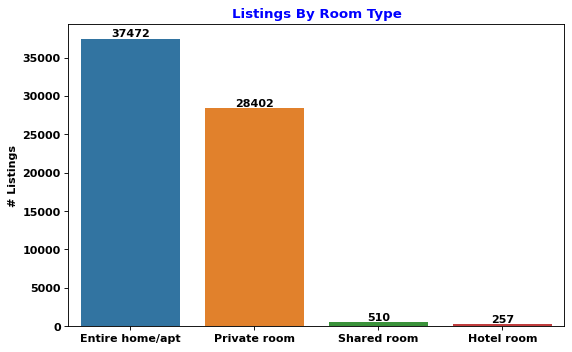

In [11]:
# Room type distribution 

plt.figure(figsize = (8,5),dpi=80),

ax = sns.barplot(x = "room_type", y = "count", data = room_type_count)

plt.title("Listings By Room Type", weight = "bold", c = "blue", fontsize = 12)
plt.xlabel("",weight = "bold",c = "k")
plt.xticks(rotation = 0, weight = "bold")
plt.ylabel("# Listings",weight = "bold", c = "k")
plt.yticks(weight = "bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')

plt.show()

In [12]:
# Distribution of neighbourhood 

neighbourhood_count = listing_data_Original.groupby("neighbourhood").id.count().sort_values(ascending=False)
neighbourhood_count = neighbourhood_count.reset_index()
neighbourhood_count.rename(columns={"id":"count"}, inplace=True)
neighbourhood_count["%"]=round(neighbourhood_count["count"]/neighbourhood_count["count"].sum()*100,2)
neighbourhood_count.head(10)

,neighbourhood,count,%
0,Westminster,7022,10.54
1,Tower Hamlets,5538,8.31
2,Hackney,5117,7.68
3,Camden,4527,6.79
4,Kensington and Chelsea,4508,6.76
5,Southwark,3929,5.90
6,Islington,3879,5.82
7,Lambeth,3727,5.59
8,Wandsworth,3442,5.16
9,Hammersmith and Fulham,2953,4.43


In [13]:
# Distribution of neighbourhood 

Top_N_neighbourhood = listing_data_Original.groupby("neighbourhood").id.count().sort_values(ascending=False)
Top_N_neighbourhood = Top_N_neighbourhood.reset_index()
Top_N_neighbourhood.rename(columns={"id":"count"}, inplace=True)
Top_N_neighbourhood = Top_N_neighbourhood.head(10)
Top_N_neighbourhood

,neighbourhood,count
0,Westminster,7022
1,Tower Hamlets,5538
2,Hackney,5117
3,Camden,4527
4,Kensington and Chelsea,4508
5,Southwark,3929
6,Islington,3879
7,Lambeth,3727
8,Wandsworth,3442
9,Hammersmith and Fulham,2953


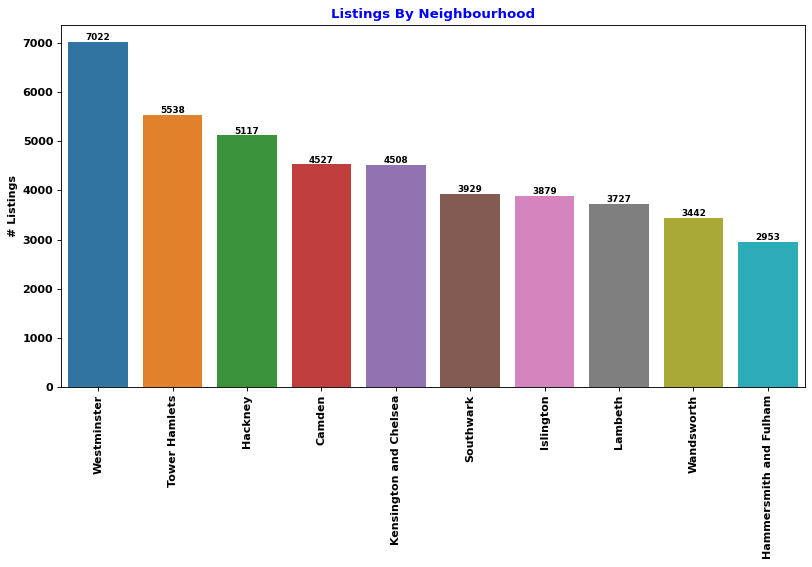

In [14]:
# Distribution of neighbourhood bar chart

plt.figure(figsize=(12,6),dpi=80),

ax = sns.barplot(x="neighbourhood", y="count", data=neighbourhood_count.head(10))
plt.title("Listings By Neighbourhood", weight="bold", c="blue", fontsize=12)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("# Listings",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black', size=8)

plt.show()

In [15]:
Average_price = round(listing_data_Original.price.mean(),2)
print(Average_price)

145.21


In [16]:
## Average price in each neighbourhood

neighbourhood_price = listing_data_Original.groupby("neighbourhood").price.mean().sort_values(ascending=False)
neighbourhood_price = neighbourhood_price.reset_index()
neighbourhood_price.head(10)

,neighbourhood,price
0,Westminster,258.130732
1,City of London,237.268229
2,Kensington and Chelsea,222.031500
3,Hammersmith and Fulham,182.060278
4,Southwark,177.908628
5,Camden,159.010382
6,Islington,145.903583
7,Wandsworth,142.662115
8,Greenwich,139.982566
9,Richmond upon Thames,139.071081


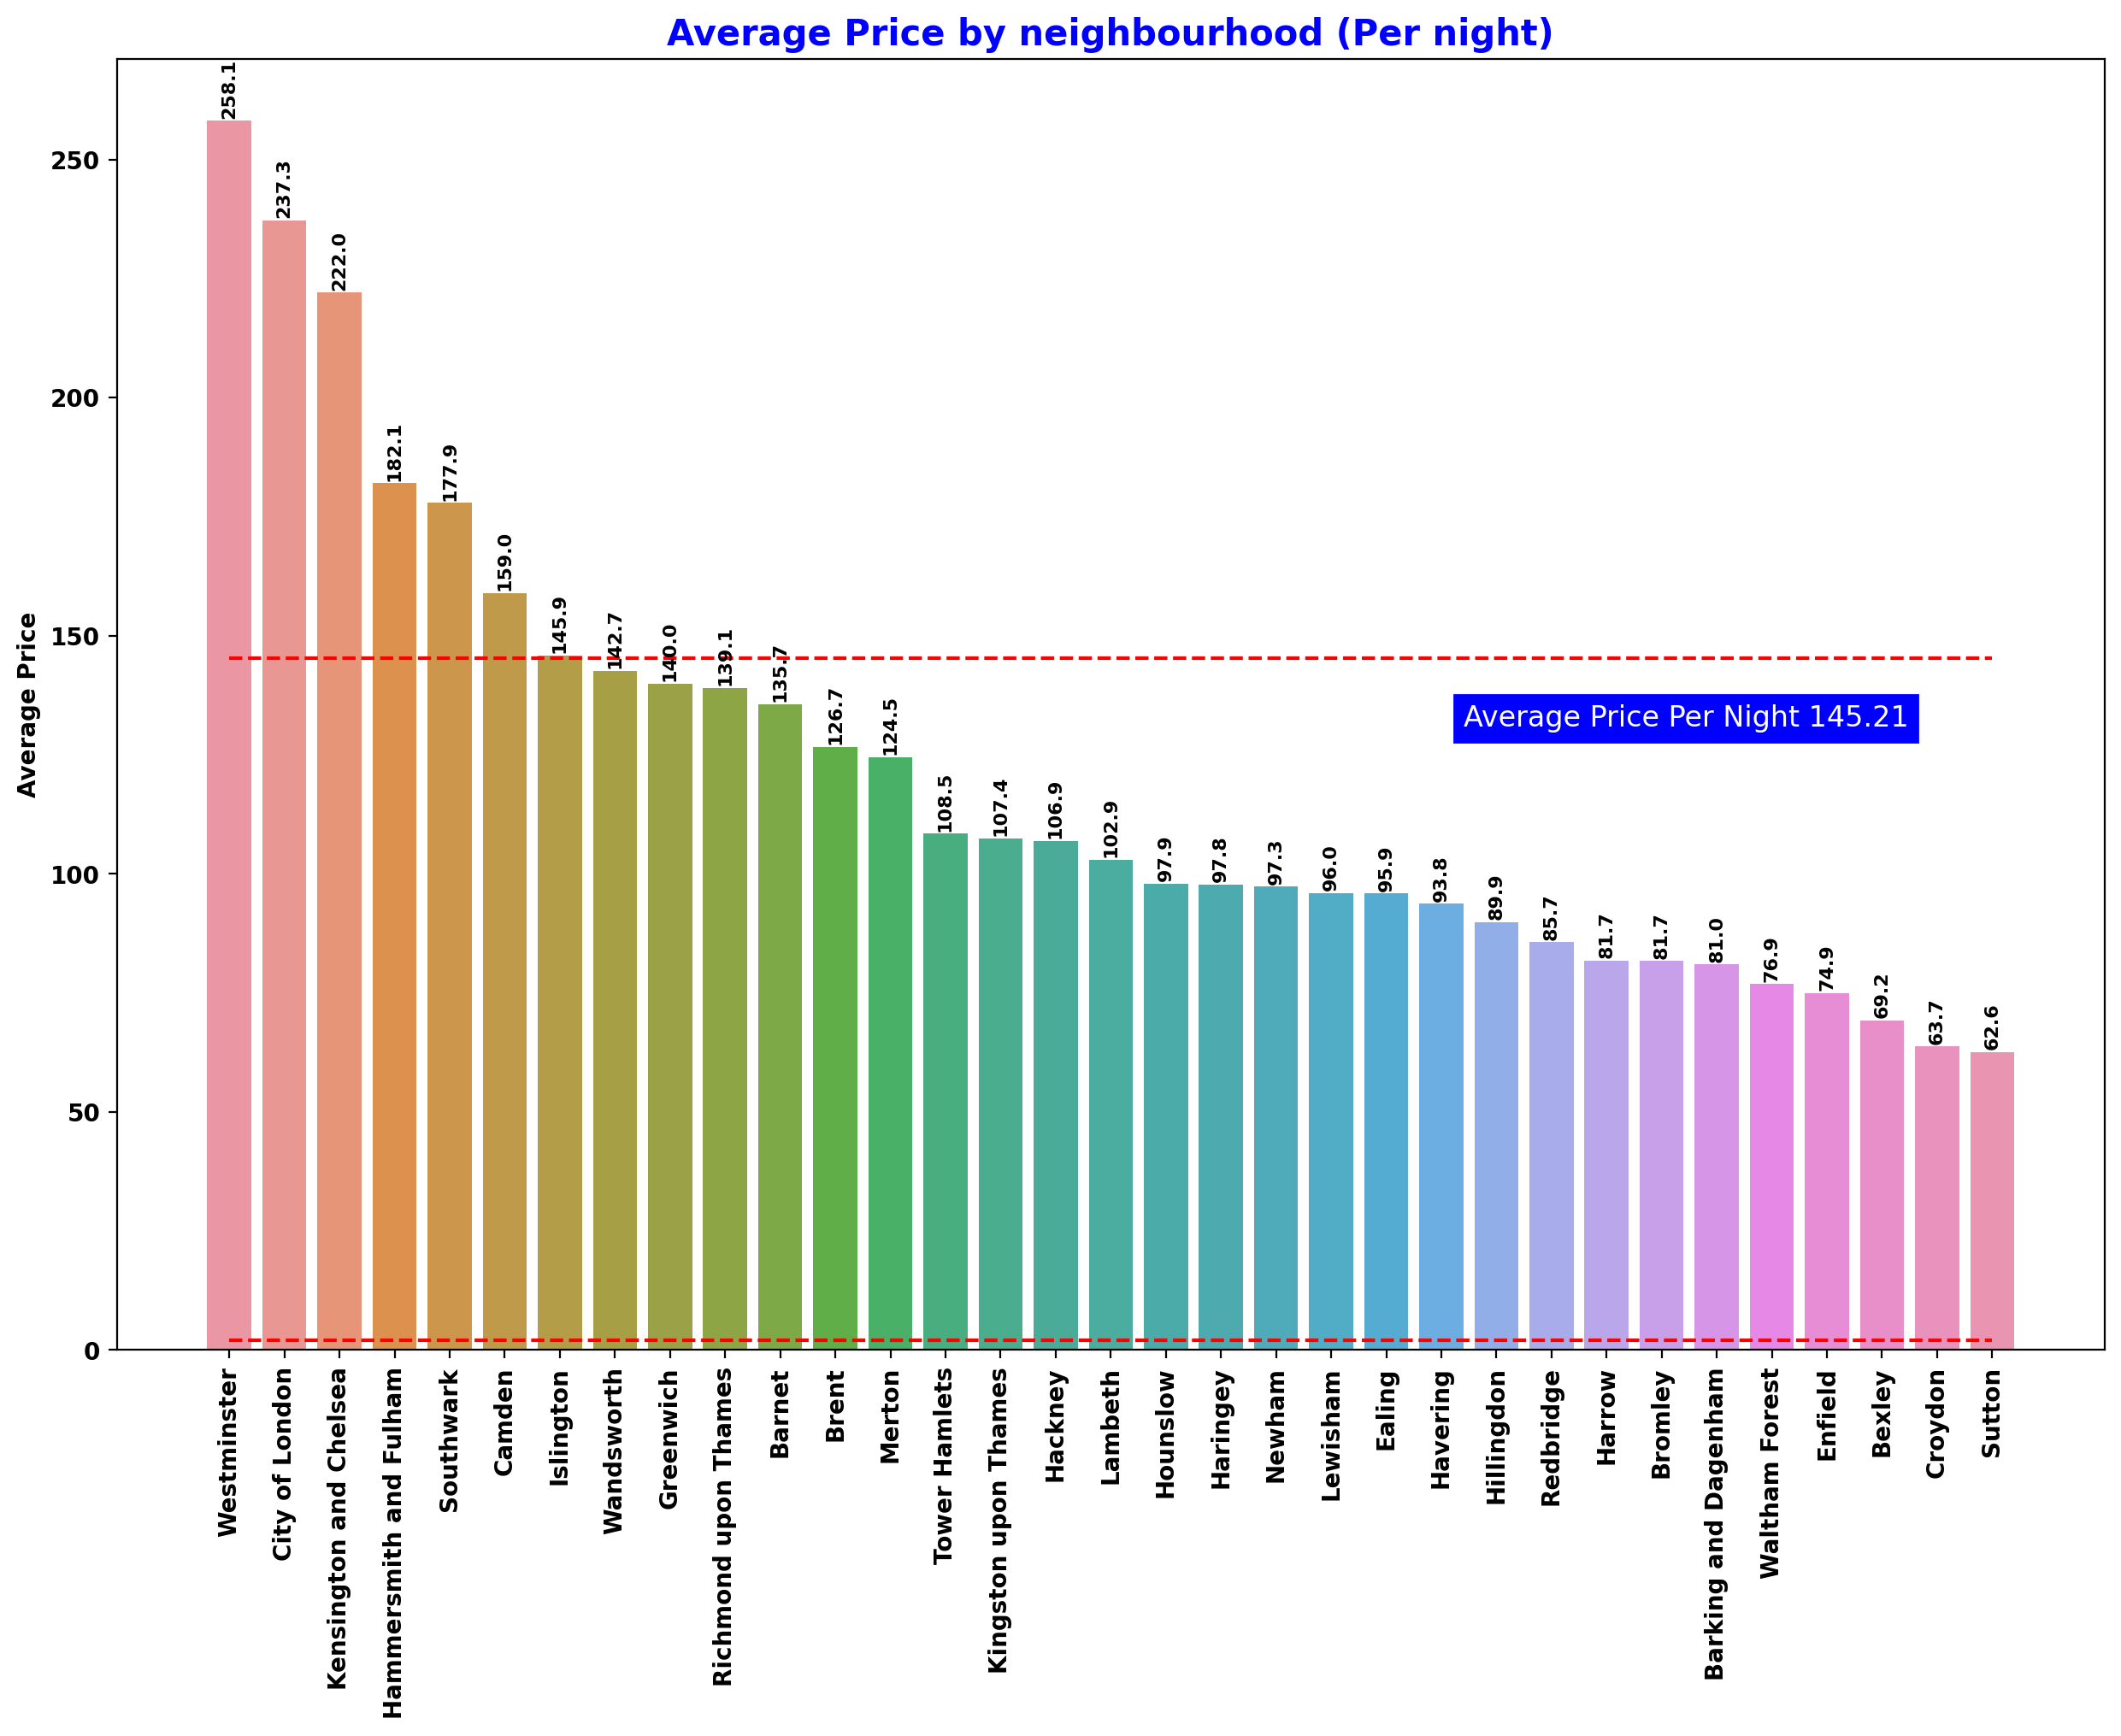

In [17]:
# Average Price per night by neighbourhood

plt.figure(figsize=(15,10),dpi=200),

ax = sns.barplot(x="neighbourhood", y="price", data=neighbourhood_price)
plt.title("Average Price by neighbourhood (Per night)", weight="bold", c="blue", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Average Price",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.5),
                    ha='center', va='bottom',weight="bold",
                    color= 'black', size=8, rotation=90)

x_coordinates = [0, 32]
y_median = [(listing_data_Original.price.mean(),2), (listing_data_Original.price.mean(),2)]

plt.plot(x_coordinates, y_median,linestyle = '--', c="red")
plt.text(22.4,131,'Average Price Per Night 145.21',fontsize = 12,backgroundcolor = 'blue',color = 'white')

plt.show()

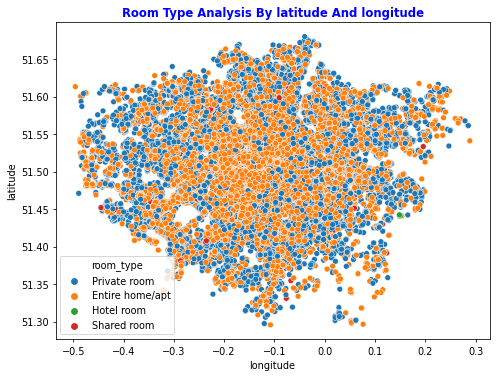

In [18]:
#Let us create a scatter plot with the longitude and the latitude data

plt.figure(figsize = (8,6),dpi=70)
sns.scatterplot(listing_data_Original.longitude, listing_data_Original.latitude, hue = listing_data_Original.room_type)
plt.title("Room Type Analysis By latitude And longitude", weight="bold", c="blue", fontsize=12)
plt.show()

In [19]:
# number_of_reviews

over_100_reviews = listing_data_Original.sort_values("number_of_reviews",ascending=False)
over_100_reviews = over_100_reviews[over_100_reviews["number_of_reviews"]>=100]
over_100_reviews = over_100_reviews.groupby("neighbourhood").count().sort_values("number_of_reviews",ascending=False).head(10)
over_100_reviews.head(3)

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
neighbourhood,,,,,,,,,,,,,,,,,
Westminster,266,266,266,266,0,266,266,266,266,266,266,266,266,266,266,266,0
Camden,188,188,188,188,0,188,188,188,188,188,188,188,188,188,188,188,0
Lambeth,175,175,175,174,0,175,175,175,175,175,175,175,175,175,175,175,0


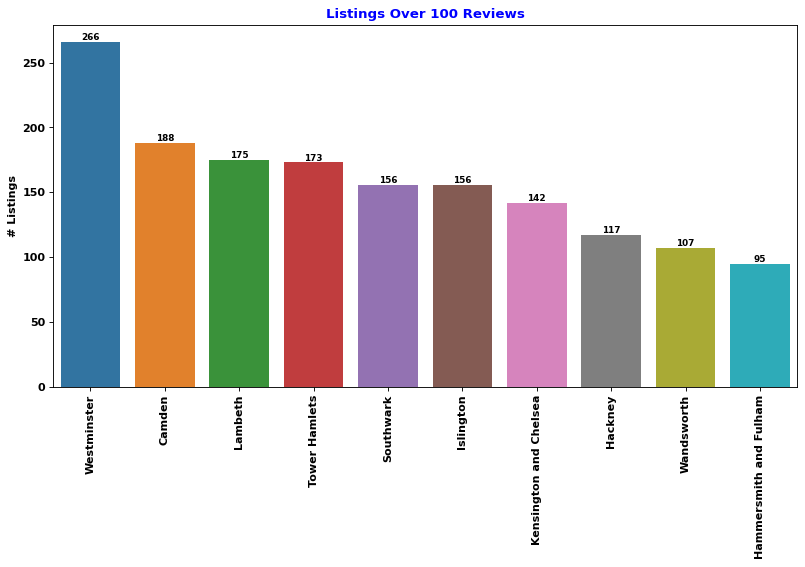

In [20]:
# Listings Over 100 Reviews

plt.figure(figsize=(12,6),dpi=80),
plt.style.use('default')
ax = sns.barplot(x=over_100_reviews.index, y="number_of_reviews", data=over_100_reviews)
plt.title("Listings Over 100 Reviews", weight="bold", c="blue", fontsize=12)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("# Listings",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8, weight="bold")

plt.show()

In [21]:
#Availability Per neighbourhood of 365 day

occupancy_neighbourhood = listing_data_Original.groupby("neighbourhood").availability_365.mean().sort_values().reset_index()
occupancy_neighbourhood.head(10)

,neighbourhood,availability_365
0,Hackney,63.006254
1,Islington,65.572828
2,Southwark,75.469331
3,Wandsworth,78.723707
4,Lambeth,79.239066
5,Tower Hamlets,85.989166
6,Haringey,86.242996
7,Lewisham,90.426178
8,Merton,95.389445
9,Hammersmith and Fulham,95.438876


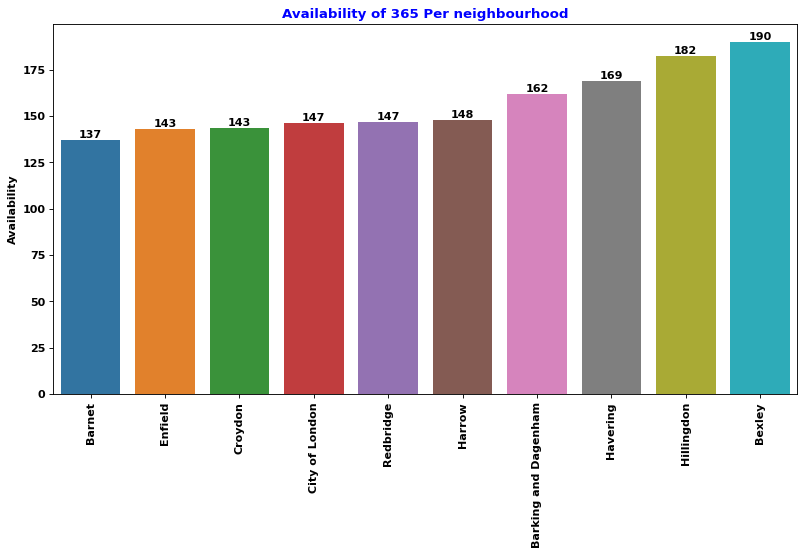

In [22]:
# Availability per neighbourhood

occupancy_neighbourhood = occupancy_neighbourhood.tail(10)
plt.figure(figsize=(12,6),dpi=80),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="availability_365", data=occupancy_neighbourhood)
plt.title("Availability of 365 Per neighbourhood", weight="bold", c="blue", fontsize=12)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Availability",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=10, weight="bold")

plt.show()

In [23]:
# Popular host by reviews

Top_N_Host = listing_data_Original.groupby(['host_id', 'host_name']).id.count().sort_values(ascending=False)
Top_N_Host = Top_N_Host.reset_index()
Top_N_Host.rename(columns={"id":"# Listings"}, inplace=True)
Top_N_Host.rename(columns={"host_id":"Host Id"}, inplace=True)
Top_N_Host.rename(columns={"host_name":"Host Name"}, inplace=True)
Top_N_Host = Top_N_Host.head(10)
Top_N_Host

,Host Id,Host Name,# Listings
0,33889201,Veeve,845
1,226804666,Miroslav,535
2,28820321,Veronica,252
3,137094377,Veeve,250
4,378060726,Svetlana,222
5,258154594,Atanas,204
6,63293666,Atanas,146
7,228928499,Beatrix,137
8,402191311,GuestReady,136
9,129230780,STK Homes,134


In [24]:
# Top Propery By Reviews

Top_N_Property_Reviews = listing_data_Original.groupby(['host_id', 'name']).number_of_reviews.sum().sort_values(ascending=False)
Top_N_Property_Reviews = Top_N_Property_Reviews.reset_index()
Top_N_Property_Reviews.rename(columns={"host_id":"Host Id"}, inplace=True)
Top_N_Property_Reviews.rename(columns={"name":"Listing Name"}, inplace=True)
Top_N_Property_Reviews.rename(columns={"number_of_reviews":"# Reviews"}, inplace=True)
Top_N_Property_Reviews = Top_N_Property_Reviews.head(10)
Top_N_Property_Reviews

,Host Id,Listing Name,# Reviews
0,216187763,Designer Studio Apartment in Central London,974
1,217727211,Double Garden View room - London House Hotel***,935
2,7716401,Cosy Dble in Kings Cross Houseshare,868
3,7716401,Comfy Double in Kings Cross Houshare,713
4,47205373,"Near HEATHROW AIRPORT, London, double room.",711
5,10398979,London's best transport hub 5 mins walk! Safe ...,699
6,7716401,Double in Kings Cross Houseshare,692
7,2990888,Lovely Double in Islington Near tube. Zone 2,650
8,1827865,Fabulous room + bathroom in gorgeous Mayfair,636
9,923042,"Large Room + Private Bathroom, E3.",630


In [25]:
# Lets have a look of all the available data types in the dataset

print(listing_data_Original.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object


### Numeric Feature Analysis

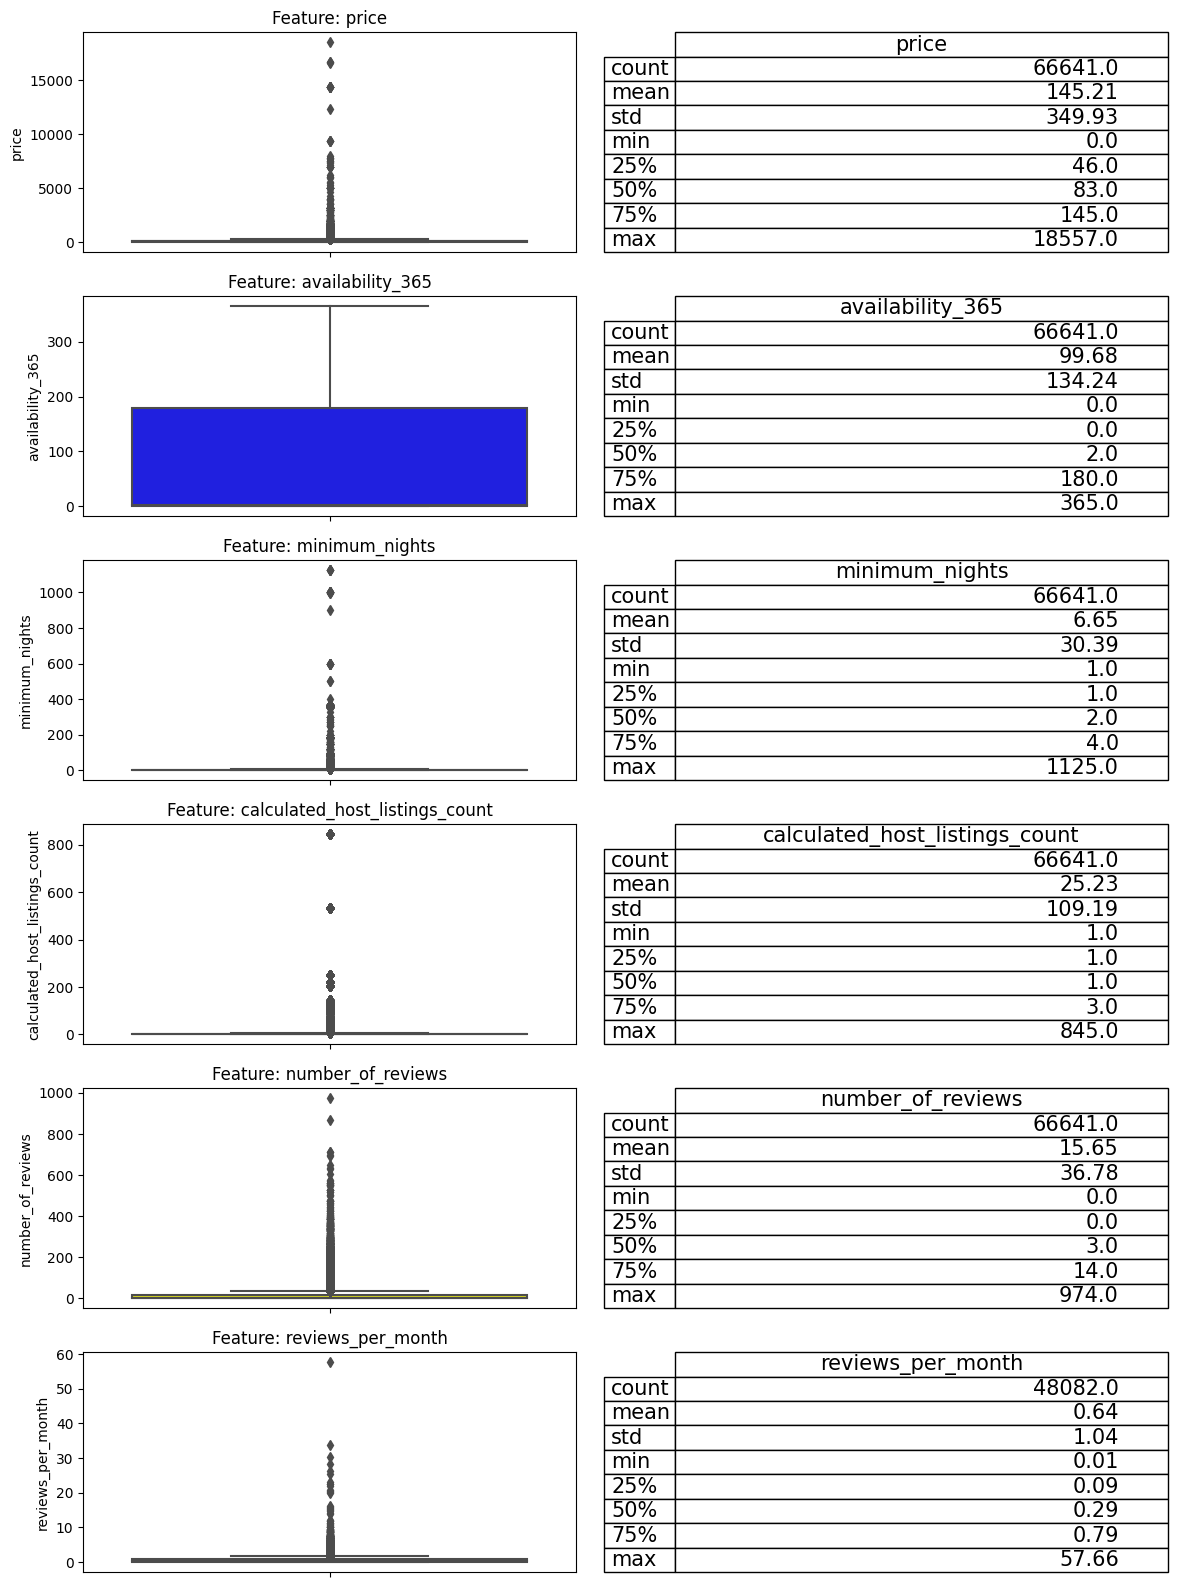

In [26]:
Numeric_Features = listing_data_Original[['price', 'availability_365', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month']]

fig, ax = plt.subplots(6, 2, figsize = (14,20))
bbox = [0, 0, 1, 1]
font_size = 15
colors = ['yellow','blue','yellow','blue','yellow','blue','yellow','blue']

for i in range(len(Numeric_Features.columns)):
    describe = listing_data_Original[Numeric_Features.columns[i]].describe().to_frame().round(2)
    sns.boxplot(y = listing_data_Original[Numeric_Features.columns[i]], ax=ax[i][0], color = colors[i])
    table = ax[i][1].table(cellText = describe.values, rowLabels = describe.index, 
                           bbox = bbox, colLabels = describe.columns)
    table.set_fontsize(font_size)
    ax[i][1].axis('off')
    ax[i][0].title.set_text('Feature: {}'.format(Numeric_Features.columns[i]))



plt.show()

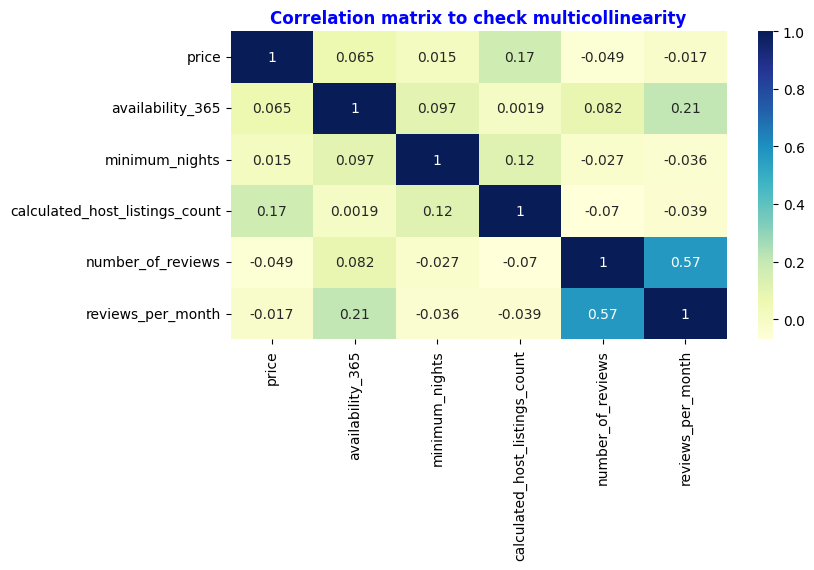

In [27]:
## Check multicollinearity 

plt.figure(figsize = (8,4), dpi = 100)

sns.heatmap(listing_data_Original[['price', 'availability_365', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month']].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation matrix to check multicollinearity",weight = "bold", c = "blue", fontsize = 12)
plt.show()

<Figure size 1000x600 with 0 Axes>

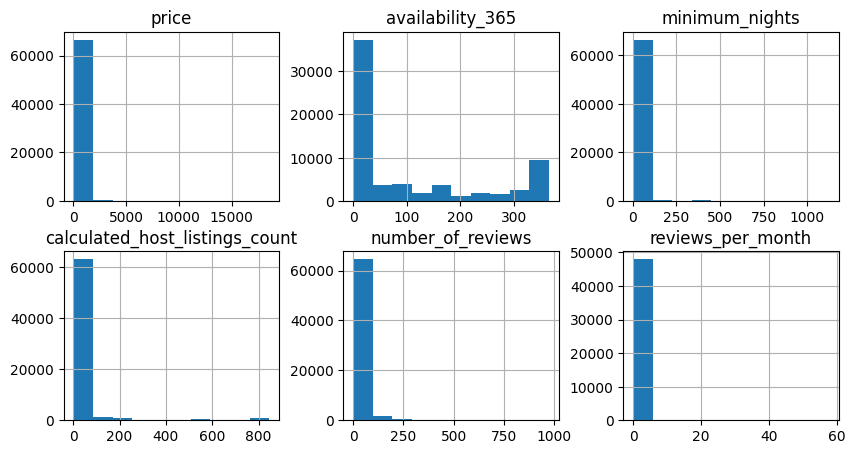

In [28]:
## Histogram to check the distribution of numeric features

plt.figure(figsize = (10,6), dpi = 100)

listing_data_Original[['price', 'availability_365', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month']].hist(figsize=(10,25),layout=(9,3))
plt.title("Distribution Of Numeric Features",weight = "bold", c = "blue", fontsize = 12)
plt.show()

### Target variable price

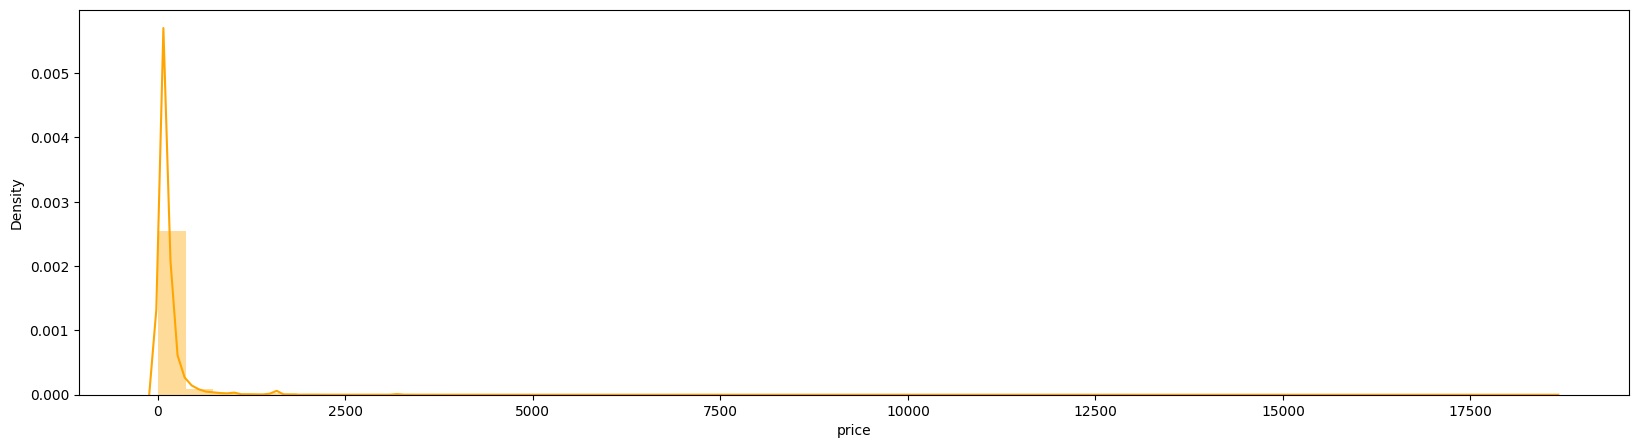

In [29]:
fig = plt.figure(figsize = (20,5))
sns.distplot(listing_data_Original['price'], color = 'orange')
plt.show()

In [30]:
print('Skewness = {}'.format(listing_data_Original['price'].skew()))
print('Kurtosis = {}'.format(listing_data_Original['price'].kurt()))

Skewness = 22.526994036596548
Kurtosis = 824.6743568855323


#### Outliers present in the target variable price. Derive a new field to analyze price better

In [31]:
listing_data_Original['PriceCategory'] = listing_data_Original['price'].apply(lambda x:  "Below 50 GBP" if (x >= 0 and x < 50)
                                                else ("50-149 GBP" if (x >= 50 and x < 150) 
                                                      else ("150-499 GBP" if (x >= 150 and x < 500) else "Above 500 GBP")))

In [32]:
# Distribution of PriceCategory 

PriceCategoryByRoomType = listing_data_Original.groupby(["PriceCategory", "room_type"]).id.count().sort_values(ascending=False)
PriceCategoryByRoomType = PriceCategoryByRoomType.reset_index()
PriceCategoryByRoomType.rename(columns={"id":"# Listings"}, inplace=True)
PriceCategoryByRoomType.rename(columns={"PriceCategory":"Price Category"}, inplace=True)
PriceCategoryByRoomType.rename(columns={"room_type":"Room Type"}, inplace=True)
PriceCategoryByRoomType.head(30)

,Price Category,Room Type,# Listings
0,50-149 GBP,Entire home/apt,21944
1,Below 50 GBP,Private room,16112
2,150-499 GBP,Entire home/apt,12411
3,50-149 GBP,Private room,10701
4,Above 500 GBP,Entire home/apt,1879
5,Below 50 GBP,Entire home/apt,1238
6,150-499 GBP,Private room,1007
7,Above 500 GBP,Private room,582
8,Below 50 GBP,Shared room,340
9,50-149 GBP,Shared room,134


#### Most of the properties are in below 150 GBP per night. This is across all the room type

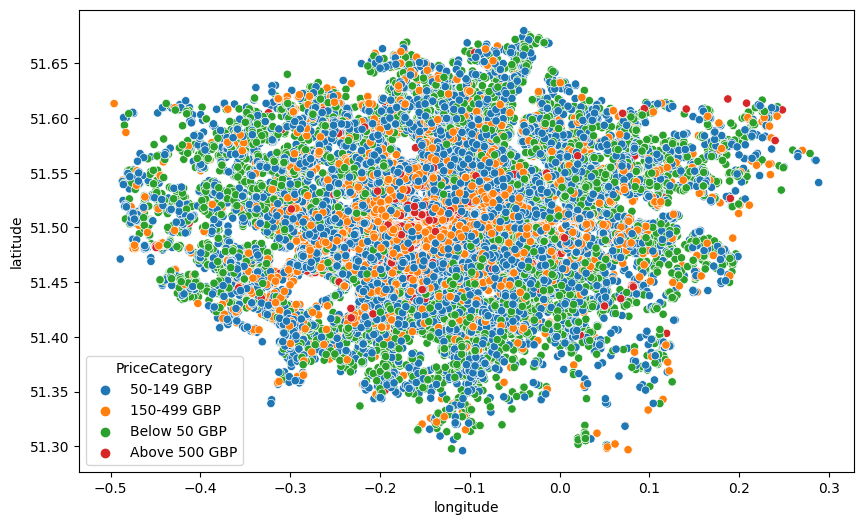

In [162]:
plt.figure(figsize=(10,6))
sns.scatterplot(listing_data_Original.longitude,listing_data_Original.latitude,hue=listing_data_Original.PriceCategory)
plt.ioff()

### Get required fields to build model and remove outliers

In [33]:
# Excluded neighbourhood_group and license as these doesn't have any values

listing_data = listing_data_Original[['id', 'name', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', "PriceCategory"]]

## Listings Name Analysis Using NLP 

In [34]:
# Check if there is any BLANK in name
listing_data['name'].isnull().sum()

24

In [35]:
# Replace Blank with 'No Listing Name'
listing_data['name'].fillna('No Listing Name', inplace = True)

In [36]:
listing_data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,PriceCategory
0,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56861,-0.11270,Private room,65,1,22,2021-11-21,0.16,2,361,1,50-149 GBP
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,2020-03-16,0.61,1,4,0,50-149 GBP
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,Westminster,51.52195,-0.14094,Entire home/apt,265,4,43,2021-06-28,0.33,1,295,1,150-499 GBP
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364,0,150-499 GBP
4,25123,Clean big Room in London (Room 1),103583,Grace,Barnet,51.57438,-0.21081,Private room,29,10,129,2020-03-15,0.91,3,0,0,Below 50 GBP


In [37]:
# Check if there is any BLANK in name

listing_data['name'].isnull().sum()

0

In [38]:
NLP_listing_data = listing_data[['host_id','name', 'price']]
NLP_listing_data.head(5)

,host_id,name,price
0,54730,Holiday London DB Room Let-on going,65
1,60302,Bright Chelsea Apartment. Chelsea!,75
2,67564,Superb 3-Bed/2 Bath & Wifi: Trendy W1,265
3,67915,Boutique Chelsea/Fulham Double bed 5-star ensuite,150
4,103583,Clean big Room in London (Room 1),29


In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stops = set(stopwords.words('english'))
print(stops)

{'all', 'own', "mustn't", 'has', 'than', 'further', 'this', 'from', 'very', 'during', 'your', 'did', 'other', 'above', 'again', 'off', 'nor', 'couldn', 'ours', 'wasn', "wasn't", 'it', 'won', 'but', 'before', 'only', 'd', 'these', "don't", 'once', 'into', 'should', "it's", 'do', 'we', 'my', 'more', 'mustn', 'a', 'were', 'hadn', 'because', 'or', 'by', 'didn', 'below', 'theirs', 'been', 'not', "wouldn't", 'what', 'doesn', 'after', 'yours', 'me', 'myself', 'yourselves', 'her', 'can', 'those', 'herself', 'yourself', 'he', "should've", 'his', 'against', 'y', 'if', 'how', 'is', 'our', 'their', 't', 'him', 'why', 'any', "you're", 'at', 'both', 'an', 'through', 'who', 'needn', 'while', 'shouldn', 'then', 'wouldn', 'now', "hasn't", 'where', 'having', 'of', 'will', 'have', "won't", 'does', 'about', 'up', 'doing', 'its', 'when', 'hers', "hadn't", 'on', 'ain', 'had', "you'll", 'the', 'am', "aren't", 'ourselves', "you'd", 's', 'there', 'here', 'don', 'as', "didn't", 'just', "isn't", 'over', 've', 's

In [41]:
def remove_punct(line):
    return re.sub('[^A-Za-z]+', ' ', line).lower()

NLP_listing_data['Name_NLP'] = NLP_listing_data['name'].apply(remove_punct)

In [42]:
NLP_listing_data[['name', 'Name_NLP']].head(10)

,name,Name_NLP
0,Holiday London DB Room Let-on going,holiday london db room let on going
1,Bright Chelsea Apartment. Chelsea!,bright chelsea apartment chelsea
2,Superb 3-Bed/2 Bath & Wifi: Trendy W1,superb bed bath wifi trendy w
3,Boutique Chelsea/Fulham Double bed 5-star ensuite,boutique chelsea fulham double bed star ensuite
4,Clean big Room in London (Room 1),clean big room in london room
5,Beautiful Ensuite Richmond-upon-Thames borough,beautiful ensuite richmond upon thames borough
6,Kew Gardens 3BR house in cul-de-sac,kew gardens br house in cul de sac
7,You are GUARANTEED to love this,you are guaranteed to love this
8,Double room/ lounge,double room lounge
9,CHARMING FAMILY HOME,charming family home


#### Remove stopwords such as the, is, at, which, and on. These doesn't add much meaning to a sentence.

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

In [45]:
def tokenize_no_stopwords(line):
    tokens = nltk.tokenize.word_tokenize(line)
    #print(tokens)
    tokens_no_stop = [w for w in tokens if w not in stopwords]
    return " ".join(tokens_no_stop)

In [46]:
NLP_listing_data['Name_NLP_Cleaned'] = NLP_listing_data['Name_NLP'].apply(tokenize_no_stopwords)
NLP_listing_data.head(3)

,host_id,name,price,Name_NLP,Name_NLP_Cleaned
0,54730,Holiday London DB Room Let-on going,65,holiday london db room let on going,holiday london db room let going
1,60302,Bright Chelsea Apartment. Chelsea!,75,bright chelsea apartment chelsea,bright chelsea apartment chelsea
2,67564,Superb 3-Bed/2 Bath & Wifi: Trendy W1,265,superb bed bath wifi trendy w,superb bed bath wifi trendy w


#### Weight of each word in listing name

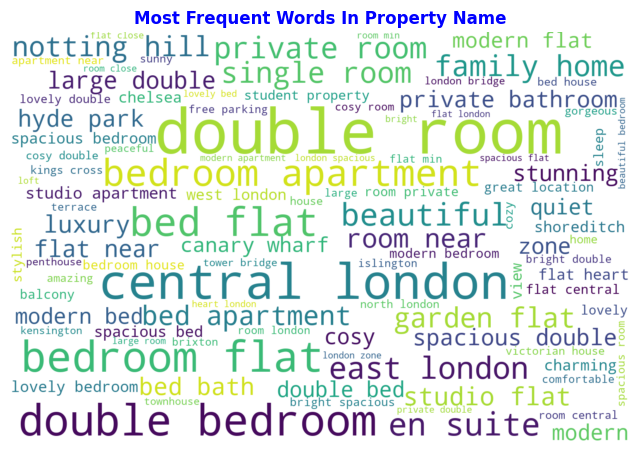

In [47]:
plt.figure(figsize=(8,6),dpi=100),
plt.style.use('default')
wordcloud = WordCloud(max_font_size=150,max_words=100, background_color="white",height=1000, width=1500).generate(" ".join(NLP_listing_data['Name_NLP_Cleaned']))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words In Property Name", weight="bold", c="blue", fontsize=12)
plt.show()

In [48]:
# Add all the name under one text variable

text = ""
for i in NLP_listing_data['Name_NLP_Cleaned']:
    text +=" " + i 

In [49]:
# Separate each word in a list
tokenized_text = nltk.tokenize.word_tokenize(text)

In [50]:
tokenized_text[:5]

['holiday', 'london', 'db', 'room', 'let']

In [51]:
# Use NLTK to create the frequency
freq_dict = nltk.FreqDist(w for w in tokenized_text)

In [52]:
nltk.FreqDist(nltk.trigrams(w for w in tokenized_text)).most_common(10)

[(('large', 'double', 'room'), 411),
 (('spacious', 'double', 'room'), 410),
 (('flat', 'central', 'london'), 360),
 (('room', 'central', 'london'), 342),
 (('room', 'private', 'bathroom'), 306),
 (('lovely', 'double', 'room'), 292),
 (('cosy', 'double', 'room'), 257),
 (('bright', 'double', 'room'), 256),
 (('en', 'suite', 'room'), 252),
 (('double', 'room', 'near'), 245)]

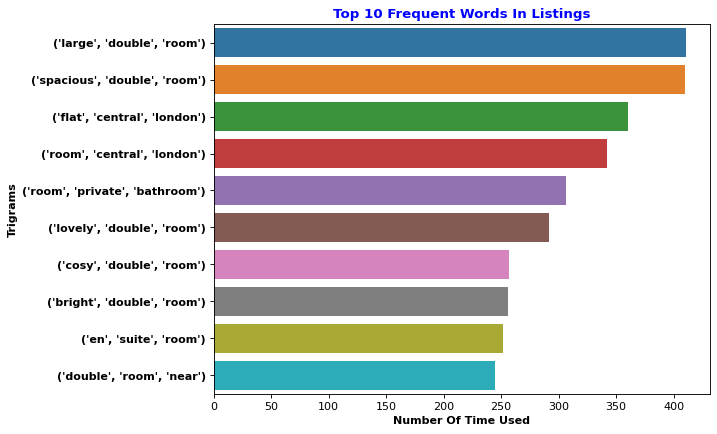

In [53]:
trigrams_data = pd.DataFrame(nltk.FreqDist(nltk.trigrams(w for w in tokenized_text)).most_common(10))
trigrams_data.columns = ['Common Words', 'Number Of Time Used']

plt.figure(figsize=(8,6),dpi=80),
plt.style.use('default')
ax = sns.barplot(x="Number Of Time Used", y="Common Words", data=trigrams_data, orient = 'h')
plt.title("Top 10 Frequent Words In Listings", weight="bold", c="blue", fontsize=12)
plt.xlabel("Number Of Time Used",weight="bold",c="k")
plt.ylabel("Trigrams",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.show()

#### Check if the common words in the expensive property

In [54]:
NLP_listing_data['price'].describe()

count    66641.000000
mean       145.207230
std        349.932373
min          0.000000
25%         46.000000
50%         83.000000
75%        145.000000
max      18557.000000
Name: price, dtype: float64

In [55]:
for i in range(90, 100, 1):
    var =NLP_listing_data["price"].values
    var = np.sort(var,axis = None)
    print("{} Percentile = {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 Percentile = ",var[-1])

90 Percentile = 250
91 Percentile = 275
92 Percentile = 300
93 Percentile = 325
94 Percentile = 354
95 Percentile = 400
96 Percentile = 472
97 Percentile = 569
98 Percentile = 795
99 Percentile = 1480
100 Percentile =  18557


In [56]:
# Lets consider anything above 98 Percentile per night is expensive

df_Expensive_Listings = NLP_listing_data[NLP_listing_data['price'] > 795]
df_Expensive_Listings.shape

(1331, 5)

In [57]:
df_Expensive_Listings.head(3)

,host_id,name,price,Name_NLP,Name_NLP_Cleaned
113,161720,Double bedroom in cottage Twickenham (sleeps 1-2),1000,double bedroom in cottage twickenham sleeps,double bedroom cottage twickenham sleeps
131,194769,STUNNING APT IN ST JAMES,1300,stunning apt in st james,stunning apt st james
370,1942893,"Garden flat, Putney",908,garden flat putney,garden flat putney


In [58]:
Expensive_Listings = ""
for i in df_Expensive_Listings['Name_NLP_Cleaned']:
    Expensive_Listings += " " + i
    
Expensive_Tokenized = nltk.tokenize.word_tokenize(Expensive_Listings)

Expensive_Dict = nltk.FreqDist(w for w in Expensive_Tokenized)

In [59]:
nltk.FreqDist(nltk.trigrams(w for w in Expensive_Tokenized)).most_common(10)

[(('nice', 'room', 'near'), 126),
 (('room', 'near', 'red'), 121),
 (('near', 'red', 'cross'), 121),
 (('red', 'cross', 'garden'), 121),
 (('cross', 'garden', 'park'), 121),
 (('park', 'nice', 'room'), 120),
 (('garden', 'park', 'nice'), 112),
 (('charming', 'room', 'near'), 58),
 (('modern', 'room', 'near'), 40),
 (('park', 'charming', 'room'), 39)]

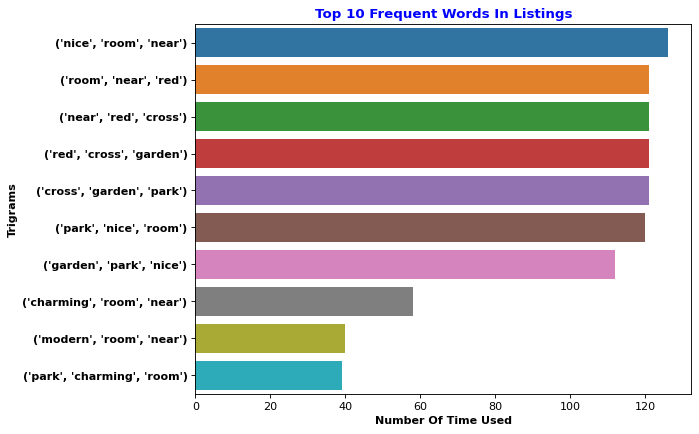

In [60]:
## Expensive property common words

expensive_trigrams_data = pd.DataFrame(nltk.FreqDist(nltk.trigrams(w for w in Expensive_Tokenized)).most_common(10))
expensive_trigrams_data.columns = ['Common Words', 'Number Of Time Used']

plt.figure(figsize=(8,6),dpi=80),
plt.style.use('default')
ax = sns.barplot(x="Number Of Time Used", y="Common Words", data=expensive_trigrams_data, orient = 'h')
plt.title("Top 10 Frequent Words In Listings", weight="bold", c="blue", fontsize=12)
plt.xlabel("Number Of Time Used",weight="bold",c="k")
plt.ylabel("Trigrams",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.show()

## Create First model without feature optimization

In [61]:
listing_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'PriceCategory'],
      dtype='object')

In [62]:
df_Model = listing_data[['latitude','longitude', 'neighbourhood', 'room_type', 'price', 'minimum_nights',
             'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 
             'availability_365','number_of_reviews_ltm','PriceCategory']]

In [63]:
df_Model.head(3)

,latitude,longitude,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,PriceCategory
0,51.56861,-0.11270,Islington,Private room,65,1,22,0.16,2,361,1,50-149 GBP
1,51.48780,-0.16813,Kensington and Chelsea,Entire home/apt,75,3,89,0.61,1,4,0,50-149 GBP
2,51.52195,-0.14094,Westminster,Entire home/apt,265,4,43,0.33,1,295,1,150-499 GBP


In [64]:
df_Model.isnull().sum()

latitude                              0
longitude                             0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 18559
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
PriceCategory                         0
dtype: int64

In [65]:
df_Model.fillna({'reviews_per_month':0}, inplace = True)

In [66]:
df_Model.isnull().sum()

latitude                          0
longitude                         0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
PriceCategory                     0
dtype: int64

In [67]:
listing_data_Original.shape

(66641, 19)

In [68]:
df_Model.shape

(66641, 12)

#### Check the Traget Variable price outliers

In [69]:
for i in range(90, 100, 1):
    var =df_Model["price"].values
    var = np.sort(var,axis = None)
    print("{} Percentile = {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 Percentile = ",var[-1])

90 Percentile = 250
91 Percentile = 275
92 Percentile = 300
93 Percentile = 325
94 Percentile = 354
95 Percentile = 400
96 Percentile = 472
97 Percentile = 569
98 Percentile = 795
99 Percentile = 1480
100 Percentile =  18557


In [70]:
## Consider only till 98 percentile to remove outliers

df_Model_Required = df_Model[(df_Model.price.between(1, 795, inclusive=True)
                                                        & (df_Model.number_of_reviews > 0))]
df_Model_Required.shape

(47565, 12)

In [71]:
df_Model_Required.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,47565.000000,47565.000000,47565.000000,47565.000000,47565.000000,47565.000000,47565.000000,47565.000000,47565.000000
mean,51.509200,-0.127575,107.980805,5.192473,21.844423,0.638677,12.998381,97.373216,2.894397
std,0.047762,0.095925,95.555176,22.698736,41.933762,1.041033,71.206510,130.206776,8.689495
min,51.295937,-0.486970,8.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,51.482130,-0.188150,45.000000,1.000000,2.000000,0.090000,1.000000,0.000000,0.000000
50%,51.513780,-0.123370,80.000000,2.000000,7.000000,0.300000,1.000000,7.000000,0.000000
75%,51.539330,-0.069250,132.000000,4.000000,22.000000,0.790000,3.000000,177.000000,3.000000
max,51.679830,0.288570,795.000000,1124.000000,974.000000,57.660000,845.000000,365.000000,516.000000


In [72]:
df_Model_Required['price'].describe()

count    47565.000000
mean       107.980805
std         95.555176
min          8.000000
25%         45.000000
50%         80.000000
75%        132.000000
max        795.000000
Name: price, dtype: float64

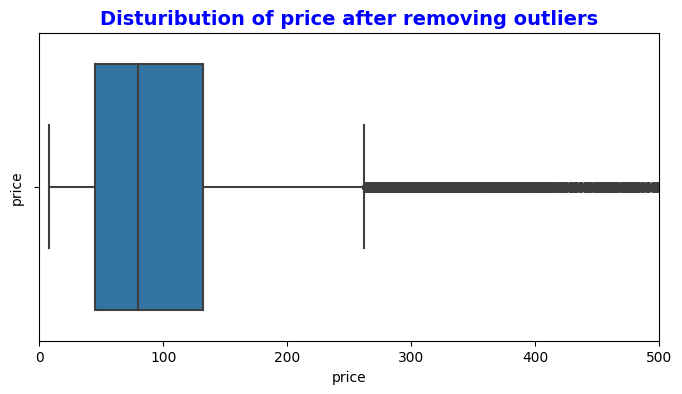

In [73]:
# Price variable Box Plot after removing ouliers

plt.figure(figsize=(8,4))
plt.xlim(0,500)
plt.ylabel('price')
sns.boxplot(x=df_Model_Required['price'])
plt.title("Disturibution of price after removing outliers", weight="bold", c="blue", fontsize=14)
plt.show()

### Create dataset for first model

In [74]:
df_Model_Required.columns

Index(['latitude', 'longitude', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'PriceCategory'],
      dtype='object')

In [75]:
print(df_Model_Required.isnull().sum())
df_Model_Required.dropna(how='any',inplace=True)
print(df_Model_Required.info()) 

latitude                          0
longitude                         0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
PriceCategory                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47565 entries, 0 to 66547
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        47565 non-null  float64
 1   longitude                       47565 non-null  float64
 2   neighbourhood                   47565 non-null  object 
 3   room_type                       47565 non-null  object 
 4   price                           47565 non-null  int64  
 5   minimum_nights

In [76]:
# We will include below list of features for the model
df_First_Regression_Model = df_Model_Required[['latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm','PriceCategory','neighbourhood']]

In [77]:
df_First_Regression_Model.shape

(47565, 12)

In [78]:
df_First_Regression_Model.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,PriceCategory,neighbourhood
0,51.56861,-0.11270,Private room,65,1,22,0.16,2,361,1,50-149 GBP,Islington
1,51.48780,-0.16813,Entire home/apt,75,3,89,0.61,1,4,0,50-149 GBP,Kensington and Chelsea
2,51.52195,-0.14094,Entire home/apt,265,4,43,0.33,1,295,1,150-499 GBP,Westminster
4,51.57438,-0.21081,Private room,29,10,129,0.91,3,0,0,Below 50 GBP,Barnet
5,51.46416,-0.32554,Private room,65,2,11,0.08,1,362,5,50-149 GBP,Hounslow


#### Label encoder for neighbourhood features

In [79]:
LabelEncode = LabelEncoder()
df_First_Regression_Model['neighbourhood'] = LabelEncode.fit_transform(df_First_Regression_Model['neighbourhood'])

In [80]:
df_First_Regression_Model.head(5)

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,PriceCategory,neighbourhood
0,51.56861,-0.11270,Private room,65,1,22,0.16,2,361,1,50-149 GBP,18
1,51.48780,-0.16813,Entire home/apt,75,3,89,0.61,1,4,0,50-149 GBP,19
2,51.52195,-0.14094,Entire home/apt,265,4,43,0.33,1,295,1,150-499 GBP,32
4,51.57438,-0.21081,Private room,29,10,129,0.91,3,0,0,Below 50 GBP,1
5,51.46416,-0.32554,Private room,65,2,11,0.08,1,362,5,50-149 GBP,17


In [81]:
# Create Dummies for the categorical feature room_type

Cat_Dummy = pd.get_dummies(df_First_Regression_Model.select_dtypes(include=['object']), drop_first = True)
Cat_Dummy.head(3)

,room_type_Hotel room,room_type_Private room,room_type_Shared room,PriceCategory_50-149 GBP,PriceCategory_Above 500 GBP,PriceCategory_Below 50 GBP
0,0,1,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,0


In [82]:
df_First_Regression_Model.columns

Index(['latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'PriceCategory', 'neighbourhood'],
      dtype='object')

In [83]:
# Drop categorical feature PriceCategory and room_type as we already created dummies

df_First_Regression_Model = df_First_Regression_Model.drop(['room_type','PriceCategory'], axis = 1)
df_First_Regression_Model.head(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood
0,51.56861,-0.11270,65,1,22,0.16,2,361,1,18
1,51.48780,-0.16813,75,3,89,0.61,1,4,0,19
2,51.52195,-0.14094,265,4,43,0.33,1,295,1,32


In [84]:
# Combine Dummies with model dataset

# Concatenate dummy variables with X
df_First_Regression_Model = pd.concat([df_First_Regression_Model, Cat_Dummy], axis=1)
df_First_Regression_Model.head(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood,room_type_Hotel room,room_type_Private room,room_type_Shared room,PriceCategory_50-149 GBP,PriceCategory_Above 500 GBP,PriceCategory_Below 50 GBP
0,51.56861,-0.11270,65,1,22,0.16,2,361,1,18,0,1,0,1,0,0
1,51.48780,-0.16813,75,3,89,0.61,1,4,0,19,0,0,0,1,0,0
2,51.52195,-0.14094,265,4,43,0.33,1,295,1,32,0,0,0,0,0,0


In [85]:
df_First_Regression_Model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47565 entries, 0 to 66547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        47565 non-null  float64
 1   longitude                       47565 non-null  float64
 2   price                           47565 non-null  int64  
 3   minimum_nights                  47565 non-null  int64  
 4   number_of_reviews               47565 non-null  int64  
 5   reviews_per_month               47565 non-null  float64
 6   calculated_host_listings_count  47565 non-null  int64  
 7   availability_365                47565 non-null  int64  
 8   number_of_reviews_ltm           47565 non-null  int64  
 9   neighbourhood                   47565 non-null  int32  
 10  room_type_Hotel room            47565 non-null  uint8  
 11  room_type_Private room          47565 non-null  uint8  
 12  room_type_Shared room           

#### Dependent and Independent Variables Split

In [86]:
X = df_First_Regression_Model[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month',
          'calculated_host_listings_count','availability_365','number_of_reviews_ltm',
          'room_type_Hotel room','room_type_Private room','room_type_Shared room','PriceCategory_Below 50 GBP'
                              ,'PriceCategory_50-149 GBP','PriceCategory_Above 500 GBP','neighbourhood']] # Independent Variables

y = df_First_Regression_Model['price'] # Dependent variable

#### Check VIF of Independent variables

In [87]:
  # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                           feature        VIF
0                         latitude  14.050436
1                        longitude   2.835951
2                   minimum_nights   1.059044
3                number_of_reviews   1.909585
4                reviews_per_month   3.383029
5   calculated_host_listings_count   1.150937
6                 availability_365   1.746676
7            number_of_reviews_ltm   2.223657
8             room_type_Hotel room   1.014503
9           room_type_Private room   3.158289
10           room_type_Shared room   1.036313
11      PriceCategory_Below 50 GBP   4.187941
12        PriceCategory_50-149 GBP   4.013719
13     PriceCategory_Above 500 GBP   1.139154
14                   neighbourhood   5.036734


#### 1 indicates no correlation. 1 and 5 indicates moderate correlation.Greater than 5 indicates severe correlation.Our dataset looks fine.

#### Splitting the dataset into test and training data

In [88]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [89]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (38052, 15)
Dimensions of the training target vector: (38052,)
Dimensions of the test feature matrix: (9513, 15)
Dimensions of the test target vector: (9513,)


#### We need to scale the data before we fit to model as dataset has high and low values

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Model 1 (Linear Regression)

				R2 score: 82.441
				RMSE: 39.568
				MAE: 25.187


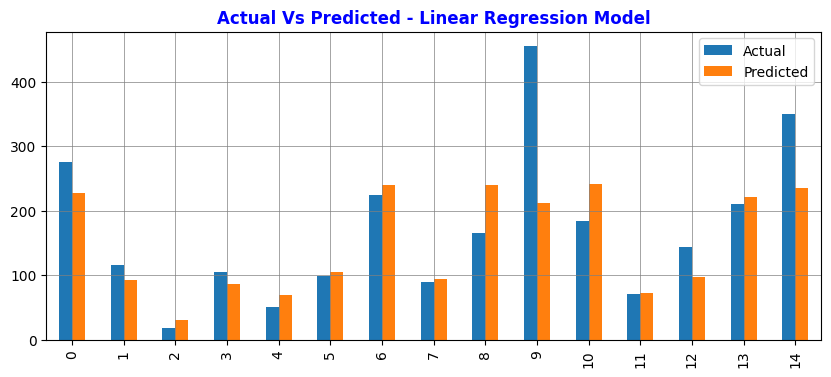

In [91]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Performance metrics

print('\t\t\t\t' +'\033[1m' + 'R2 score: {:.3f}'.format(r2_score(y_test, y_pred)*100))
print('\t\t\t\t' +'RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('\t\t\t\t' +'MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))

# Actuals Vs Predicted
error_diff = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': y_pred.flatten()})
#print(error_diff.head(5))

#Visualize the error
df_reg_error = error_diff.head(15)
df_reg_error.plot(kind = 'bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual Vs Predicted - Linear Regression Model", weight="bold", c="blue", fontsize=12)
plt.show()

### Model 2 (Gradient Boosting Regressor)

				R2 score: 68.723
				RMSE: 52.809
				MAE: 34.347


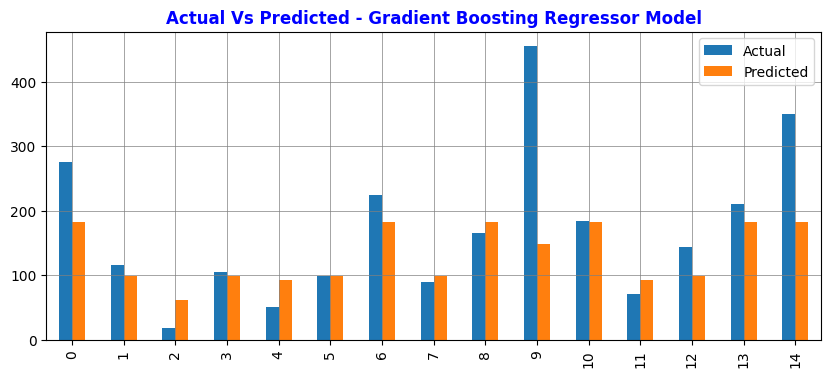

In [92]:
#Gradient Boosting Regressor
GBoost = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.01)
GBoost.fit(X_train, y_train)

y_pred = GBoost.predict(X_test)

## Performance metrics
print('\t\t\t\t' +'\033[1m' + 'R2 score: {:.3f}'.format(r2_score(y_test, y_pred)*100))
print('\t\t\t\t' +'RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('\t\t\t\t' +'MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))

# Actuals Vs Predicted
error_diff_gb = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': y_pred.flatten()})
#print(error_diff.head(5))

#Visualize the error
df_gb_error = error_diff_gb.head(15)
df_gb_error.plot(kind = 'bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual Vs Predicted - Gradient Boosting Regressor Model", weight="bold", c="blue", fontsize=12)
plt.show()

#### From the first 2 models, Linear Regression provided better R2 score of 82.44

## Feature Transformation And Other Models

In [93]:
# We loaded the data earlier and kept a copy

listing_data_Original.shape

(66641, 19)

In [94]:
df_Model_Feature_Optimized = listing_data_Original[['latitude', 'longitude', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm','PriceCategory']]

In [95]:
df_Model_Feature_Optimized.shape

(66641, 12)

In [96]:
df_Model_Feature_Optimized.isnull().sum().sort_values(ascending = False)

reviews_per_month                 18559
latitude                              0
longitude                             0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
PriceCategory                         0
dtype: int64

In [97]:
df_Model_Feature_Optimized.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,66641.000000,66641.000000,66641.000000,66641.000000,66641.000000,48082.000000,66641.000000,66641.000000,66641.000000
mean,51.509631,-0.127954,145.207230,6.654852,15.651086,0.635780,25.229979,99.679807,2.078915
std,0.048334,0.097315,349.932373,30.393704,36.777232,1.037195,109.186162,134.239988,7.466038
min,51.295937,-0.496160,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,51.482870,-0.188670,46.000000,1.000000,0.000000,0.090000,1.000000,0.000000,0.000000
50%,51.513830,-0.124930,83.000000,2.000000,3.000000,0.290000,1.000000,2.000000,0.000000
75%,51.539960,-0.068960,145.000000,4.000000,14.000000,0.790000,3.000000,180.000000,1.000000
max,51.679830,0.288570,18557.000000,1125.000000,974.000000,57.660000,845.000000,365.000000,516.000000


#### Excluded price of 0 and only one listing of property with high value of 18557. Also, it doesn't make sense with listings of no reviews.

In [98]:
df_Model_Feature_Optimized = df_Model_Feature_Optimized[(df_Model_Feature_Optimized.price.between(1, 18557, inclusive=False)
                                                        & (df_Model_Feature_Optimized.number_of_reviews > 0))]
df_Model_Feature_Optimized.shape

(48072, 12)

In [99]:
df_Model_Feature_Optimized.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,48072.000000,48072.000000,48072.000000,48072.000000,48072.000000,48072.000000,48072.000000,48072.000000,48072.000000
mean,51.509213,-0.127723,124.800112,5.232817,21.693543,0.635611,14.330837,97.866617,2.879972
std,0.047608,0.095681,250.465934,23.749557,41.760002,1.036970,76.346693,130.487093,8.655733
min,51.295937,-0.486970,8.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,51.482368,-0.188030,46.000000,1.000000,2.000000,0.090000,1.000000,0.000000,0.000000
50%,51.513720,-0.123755,81.000000,2.000000,7.000000,0.290000,1.000000,7.000000,0.000000
75%,51.539160,-0.069547,135.000000,4.000000,22.000000,0.790000,3.000000,178.000000,3.000000
max,51.679830,0.288570,16706.000000,1124.000000,974.000000,57.660000,845.000000,365.000000,516.000000


In [100]:
# Function to transform numeric variable. Technique - Tukey Text

def fn_Tukey_Text(DataFrame, Feature):
    Q1 = np.percentile(DataFrame[Feature], 25)
    Q3 = np.percentile(DataFrame[Feature], 75)
    IQR = Q3 - Q1
    Outlier_Terms = 1.5 * IQR
    Outliers_DF = DataFrame[(DataFrame[Feature] < Q1 - Outlier_Terms) | (DataFrame[Feature] > Q3 + Outlier_Terms)].index
    return Outliers_DF

In [101]:
Outliers_DF = fn_Tukey_Text(df_Model_Feature_Optimized,'price')

In [102]:
Outliers_DF.shape

(3339,)

In [103]:
df_Model_Feature_Optimized.drop(Outliers_DF, inplace = True)

df_Model_Feature_Optimized.reset_index(drop = True, inplace = True)

In [104]:
df_Model_Feature_Optimized.shape

(44733, 12)

In [105]:
df_Model_Feature_Optimized['price'].describe()

count    44733.000000
mean        89.563812
std         55.895023
min          8.000000
25%         45.000000
50%         78.000000
75%        120.000000
max        268.000000
Name: price, dtype: float64

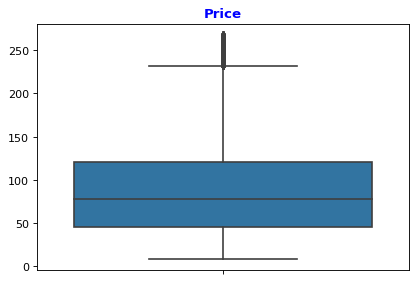

In [106]:
plt.figure(figsize = (6,4),dpi = 80)
sns.boxplot(y = df_Model_Feature_Optimized['price'])
plt.title("Price", weight="bold", c="blue", fontsize=12)
plt.ylabel("")
plt.show()

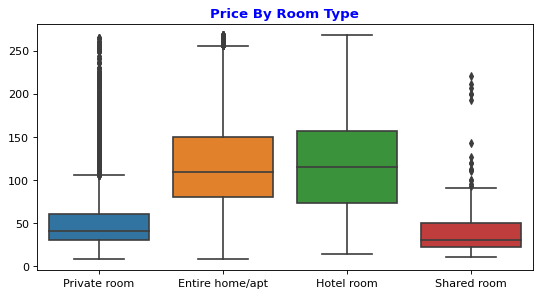

In [107]:
plt.figure(figsize=(8,4),dpi = 80)
sns.boxplot(data = df_Model_Feature_Optimized, x = 'room_type', y = 'price')
plt.title("Price By Room Type", weight="bold", c="blue", fontsize=12)
plt.ylabel("")
plt.xlabel("")
plt.show()

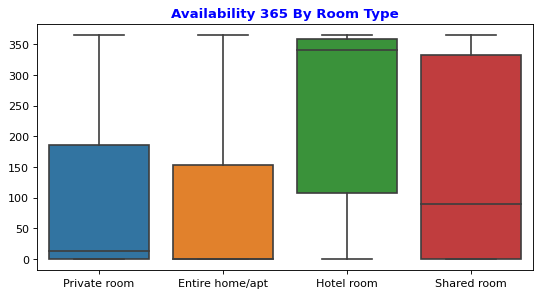

In [108]:
plt.figure(figsize=(8,4),dpi = 80)
sns.boxplot(data = df_Model_Feature_Optimized, x='room_type', y='availability_365')
plt.title("Availability 365 By Room Type", weight="bold", c="blue", fontsize=12)
plt.ylabel("")
plt.xlabel("")
plt.show()

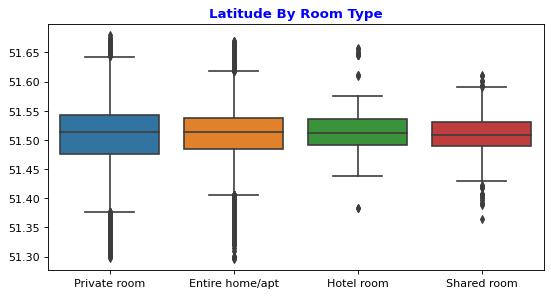

In [109]:
plt.figure(figsize=(8,4),dpi = 80)
sns.boxplot(data=df_Model_Feature_Optimized, x='room_type', y='latitude')
plt.title("Latitude By Room Type", weight="bold", c="blue", fontsize=12)
plt.ylabel("")
plt.xlabel("")
plt.show()

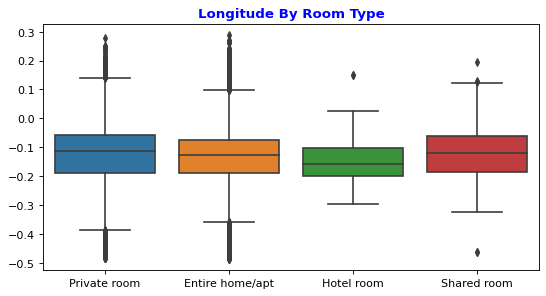

In [110]:
plt.figure(figsize=(8,4),dpi = 80)
sns.boxplot(data=df_Model_Feature_Optimized, x='room_type', y='longitude')
plt.title("Longitude By Room Type", weight="bold", c="blue", fontsize=12)
plt.ylabel("")
plt.xlabel("")
plt.show()

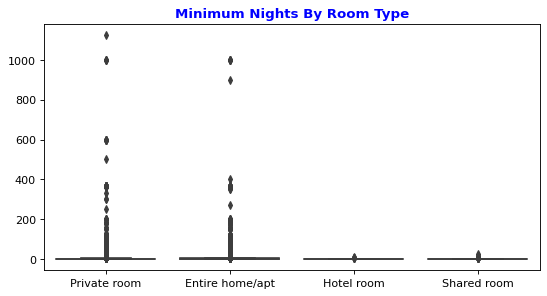

In [111]:
plt.figure(figsize=(8,4),dpi = 80)
sns.boxplot(data=df_Model_Feature_Optimized, x='room_type', y='minimum_nights')
plt.title("Minimum Nights By Room Type", weight="bold", c="blue", fontsize=12)
plt.ylabel("")
plt.xlabel("")
plt.show()

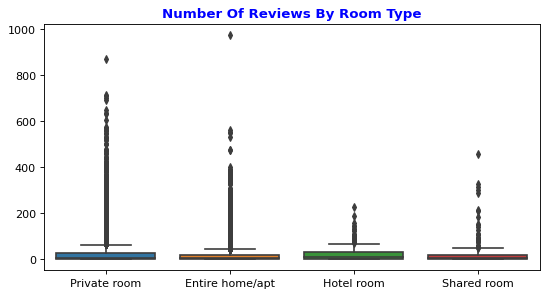

In [112]:
plt.figure(figsize=(8,4),dpi = 80)
sns.boxplot(data=df_Model_Feature_Optimized, x='room_type', y='number_of_reviews')
plt.title("Number Of Reviews By Room Type", weight="bold", c="blue", fontsize=12)
plt.ylabel("")
plt.xlabel("")
plt.show()

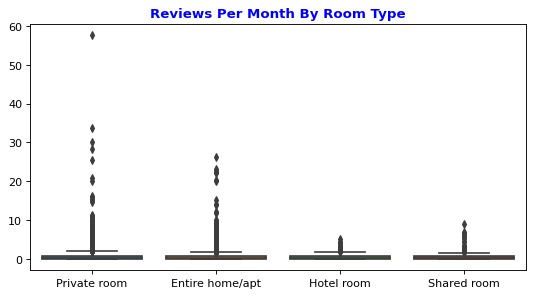

In [113]:
plt.figure(figsize=(8,4),dpi = 80)
sns.boxplot(data=df_Model_Feature_Optimized, x='room_type', y='reviews_per_month')
plt.title("Reviews Per Month By Room Type", weight="bold", c="blue", fontsize=12)
plt.ylabel("")
plt.xlabel("")
plt.show()

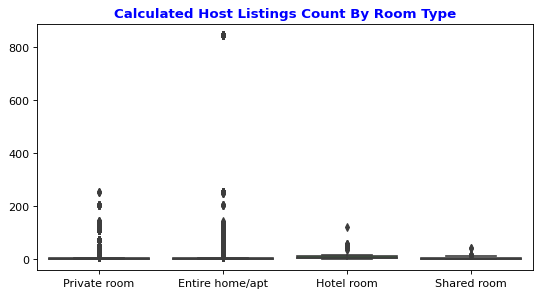

In [114]:
plt.figure(figsize=(8,4),dpi = 80)
sns.boxplot(data=df_Model_Feature_Optimized, x='room_type', y='calculated_host_listings_count')
plt.title("Calculated Host Listings Count By Room Type", weight="bold", c="blue", fontsize=12)
plt.ylabel("")
plt.xlabel("")
plt.show()

In [115]:

Numeric_Feature = df_Model_Feature_Optimized[['price', 'availability_365', 'minimum_nights'
                              ,'calculated_host_listings_count','number_of_reviews','number_of_reviews_ltm']]
for col in Numeric_Feature:
    sk = abs(df_Model_Feature_Optimized[col].skew())
    print("Feature " ,col, ":", "Min Value" ,df_Model_Feature_Optimized[col].min(), ", Skewness : {:03.2f}".format(sk))


Feature  price : Min Value 8 , Skewness : 0.99
Feature  availability_365 : Min Value 0 , Skewness : 1.06
Feature  minimum_nights : Min Value 1 , Skewness : 26.10
Feature  calculated_host_listings_count : Min Value 1 , Skewness : 14.40
Feature  number_of_reviews : Min Value 1 , Skewness : 5.21
Feature  number_of_reviews_ltm : Min Value 0 , Skewness : 19.32


## Transform the features

In [116]:
from scipy.stats import boxcox

In [117]:
df_Model_Feature_Optimized['price'], price_t = boxcox(df_Model_Feature_Optimized['price'])

print('Price Trans: {:03.3f}'.format(price_t))

Price Trans: 0.117


In [118]:
df_Model_Feature_Optimized['calculated_host_listings_count'], calculated_host_listings_count_t = boxcox(df_Model_Feature_Optimized['calculated_host_listings_count'])

print('calculated_host_listings_count Trans: {:03.3f}'.format(calculated_host_listings_count_t))

calculated_host_listings_count Trans: -0.942


In [119]:
df_Model_Feature_Optimized['minimum_nights'], minimum_nights_t = boxcox(df_Model_Feature_Optimized['minimum_nights'])

print('minimum_nights Trans: {:03.3f}'.format(minimum_nights_t))

minimum_nights Trans: -0.518


In [120]:
from sklearn.preprocessing import PowerTransformer

In [121]:
Transform_Yeo = PowerTransformer(method='yeo-johnson')

In [122]:
feature = df_Model_Feature_Optimized['reviews_per_month'].values
myData_reviews_per_month = pd.DataFrame({'x':feature})
Transform_Yeo.fit(myData_reviews_per_month)

print(Transform_Yeo.lambdas_)

[-1.74207966]


In [123]:
from scipy.special import boxcox1p

In [124]:
df_Model_Feature_Optimized['reviews_per_month']= boxcox1p(df_Model_Feature_Optimized['reviews_per_month'],Transform_Yeo.lambdas_)
print('reviews_per_month Trans: {}'.format(Transform_Yeo.lambdas_))

reviews_per_month Trans: [-1.74207966]


In [125]:
feature = df_Model_Feature_Optimized['number_of_reviews'].values
myData_number_of_reviews = pd.DataFrame({'x':feature})
Transform_Yeo.fit(myData_number_of_reviews)

print(Transform_Yeo.lambdas_)

[-0.2243584]


In [126]:
df_Model_Feature_Optimized['number_of_reviews']= boxcox1p(df_Model_Feature_Optimized['number_of_reviews'],Transform_Yeo.lambdas_)
print('number_of_reviews Trans: {}'.format(Transform_Yeo.lambdas_))

number_of_reviews Trans: [-0.2243584]


In [127]:
feature = df_Model_Feature_Optimized['availability_365'].values
myData_availability_365 = pd.DataFrame({'x':feature})
Transform_Yeo.fit(myData_availability_365)

print(Transform_Yeo.lambdas_)

[-0.09871933]


In [128]:
df_Model_Feature_Optimized['availability_365']= boxcox1p(df_Model_Feature_Optimized['availability_365'],Transform_Yeo.lambdas_)
print('availability_365 Trans: {}'.format(Transform_Yeo.lambdas_))

availability_365 Trans: [-0.09871933]


In [129]:
feature = df_Model_Feature_Optimized['number_of_reviews_ltm'].values
myData_number_of_reviews_ltm = pd.DataFrame({'x':feature})
Transform_Yeo.fit(myData_number_of_reviews_ltm)

print(Transform_Yeo.lambdas_)

[-0.92134824]


In [130]:
df_Model_Feature_Optimized['number_of_reviews_ltm']= boxcox1p(df_Model_Feature_Optimized['number_of_reviews_ltm'],Transform_Yeo.lambdas_)
print('number_of_reviews Trans: {}'.format(Transform_Yeo.lambdas_))

number_of_reviews Trans: [-0.92134824]


In [131]:
df_Model_Feature_Optimized.sample(3)

,latitude,longitude,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,PriceCategory
30171,51.52391,-0.06648,Tower Hamlets,Entire home/apt,7.093582,0.582411,1.854524,0.224747,0.000000,0.00000,0.0,150-499 GBP
34796,51.58687,-0.08356,Haringey,Entire home/apt,6.814016,0.582411,0.641939,0.037911,0.000000,0.00000,0.0,150-499 GBP
9169,51.45379,-0.02771,Lewisham,Private room,4.493531,0.582411,0.973689,0.028811,0.865296,4.21052,0.0,Below 50 GBP


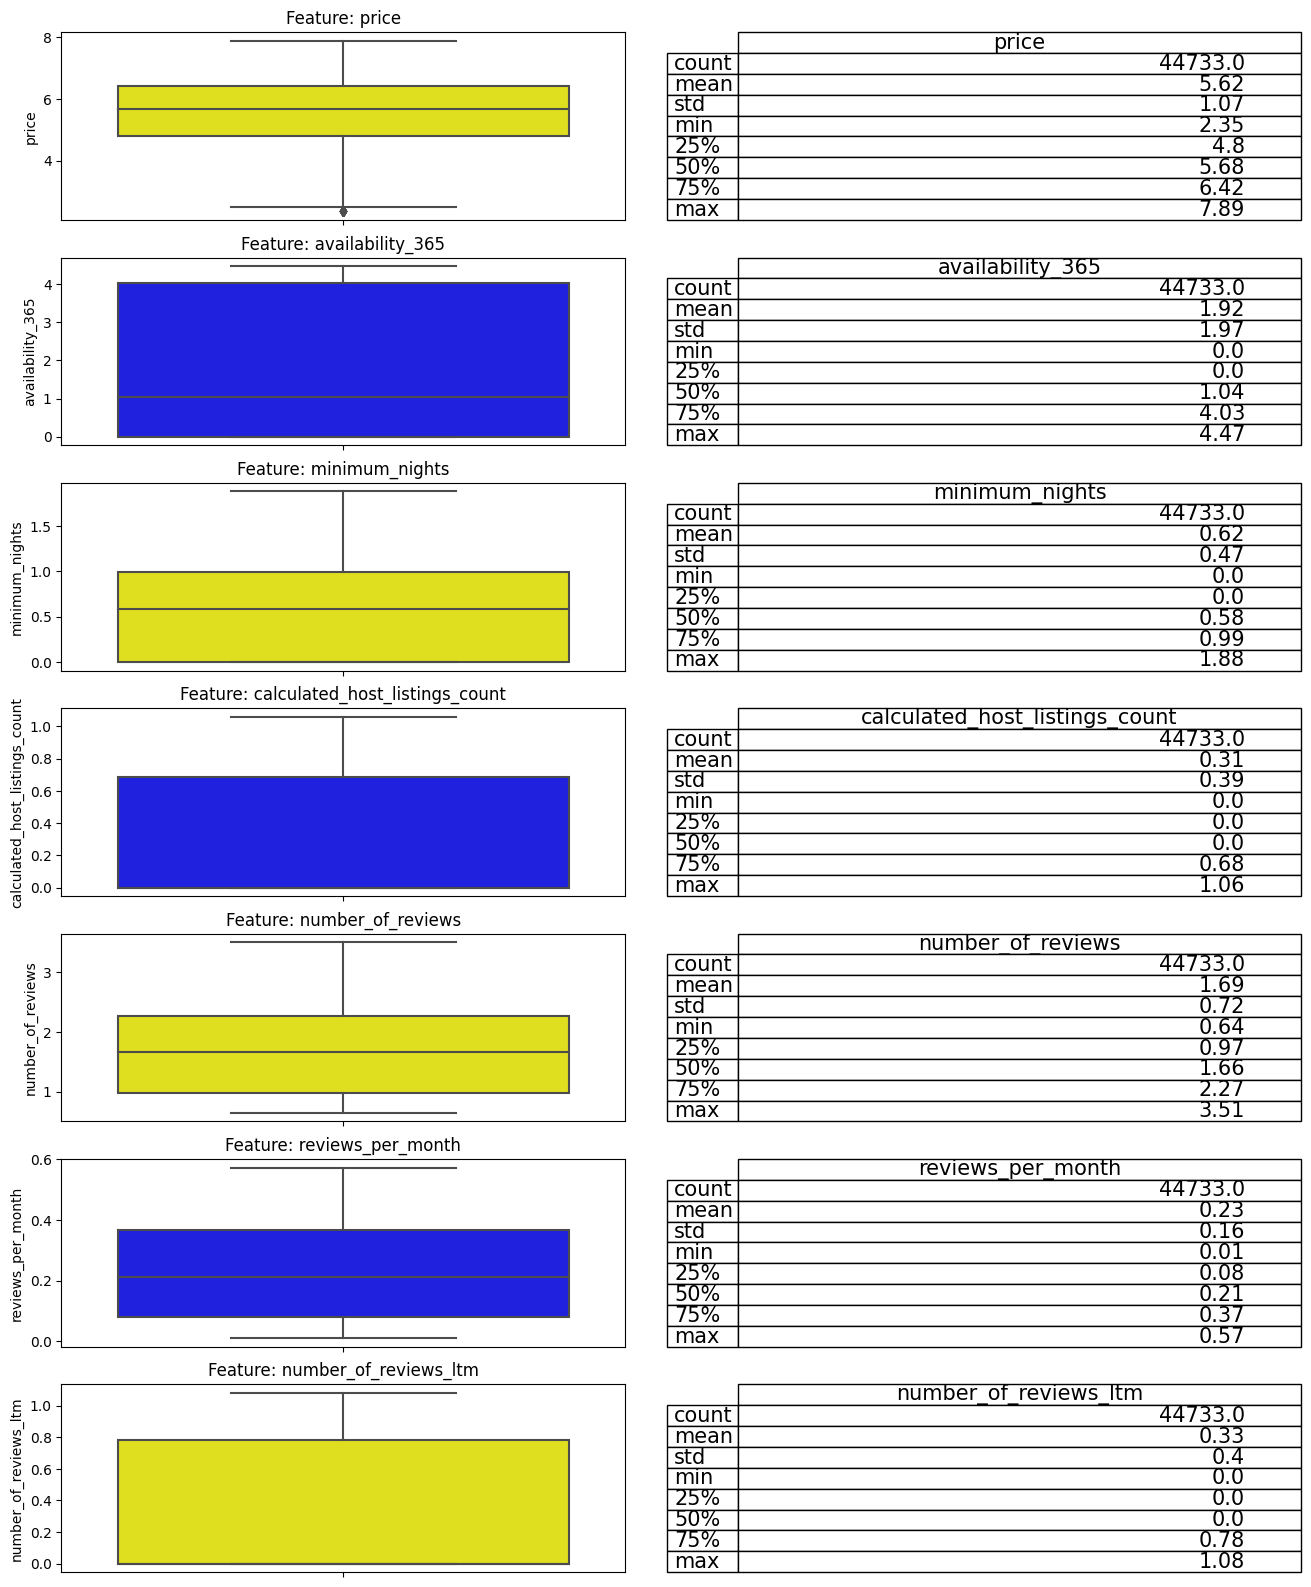

In [132]:
Numeric_Features = df_Model_Feature_Optimized[['price', 'availability_365', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month', 'number_of_reviews_ltm']]

fig, ax = plt.subplots(7, 2, figsize = (16,20))
bbox = [0, 0, 1, 1]
font_size = 15
colors = ['yellow','blue','yellow','blue','yellow','blue','yellow','blue','yellow']

for i in range(len(Numeric_Features.columns)):
    describe = df_Model_Feature_Optimized[Numeric_Features.columns[i]].describe().to_frame().round(2)
    sns.boxplot(y = df_Model_Feature_Optimized[Numeric_Features.columns[i]], ax=ax[i][0], color = colors[i])
    table = ax[i][1].table(cellText = describe.values, rowLabels = describe.index, 
                           bbox = bbox, colLabels = describe.columns)
    table.set_fontsize(font_size)
    ax[i][1].axis('off')
    ax[i][0].title.set_text('Feature: {}'.format(Numeric_Features.columns[i]))



plt.show()

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

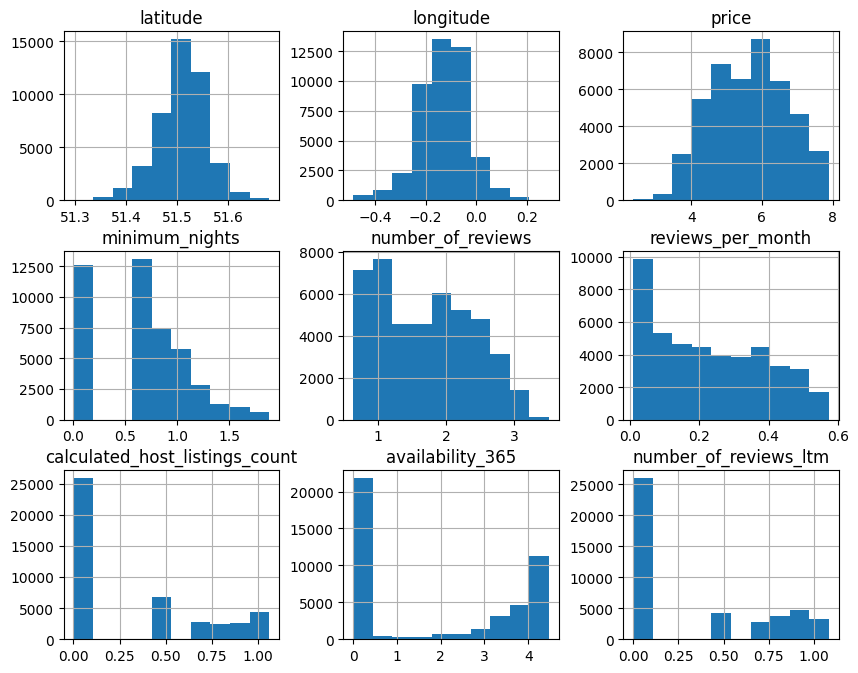

In [133]:
df_Model_Feature_Optimized.hist(figsize=(10,25),layout=(9,3))

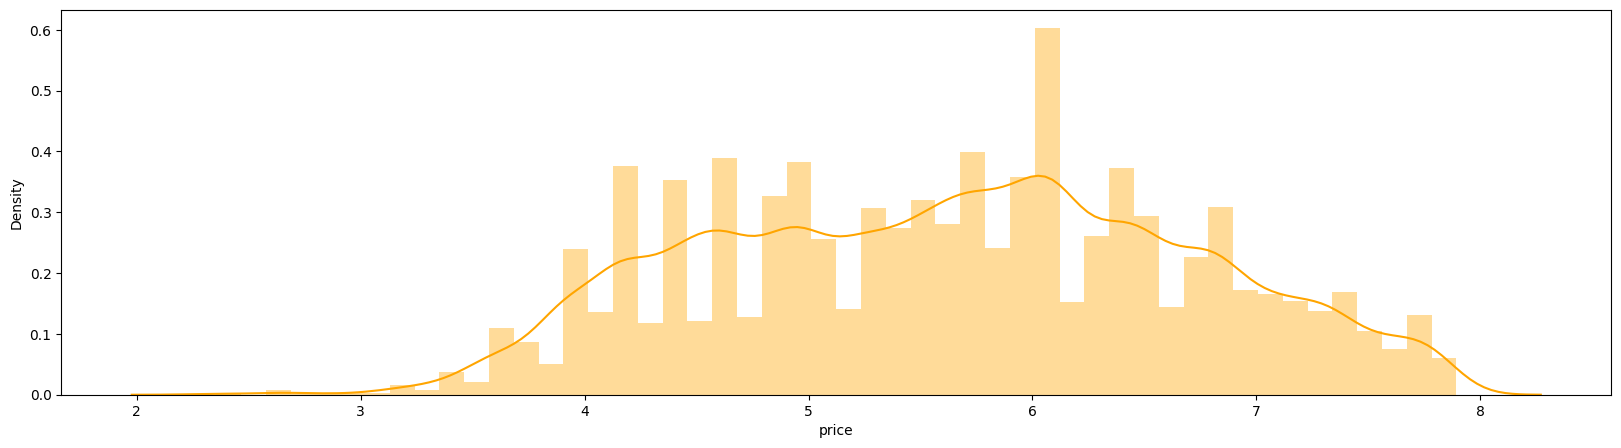

In [134]:
fig = plt.figure(figsize=(20,5))
sns.distplot(df_Model_Feature_Optimized['price'],color='orange')
plt.show()

In [135]:
# Check the skewness post feature optimization
Numeric_Feature = df_Model_Feature_Optimized[['price', 'availability_365', 'minimum_nights'
                              ,'calculated_host_listings_count','number_of_reviews','number_of_reviews_ltm']]
for col in Numeric_Feature:
    sk = abs(df_Model_Feature_Optimized[col].skew())
    print("Feature " ,col, ":", "Min Value" ,df_Model_Feature_Optimized[col].min(), ", Skewness : {:03.2f}".format(sk))


Feature  price : Min Value 2.35424174610344 , Skewness : 0.02
Feature  availability_365 : Min Value 0.0 , Skewness : 0.16
Feature  minimum_nights : Min Value 0.0 , Skewness : 0.11
Feature  calculated_host_listings_count : Min Value 0.0 , Skewness : 0.65
Feature  number_of_reviews : Min Value 0.6419389090475964 , Skewness : 0.10
Feature  number_of_reviews_ltm : Min Value 0.0 , Skewness : 0.55


## Transform Categorical Features

In [136]:
df_Model_Feature_Optimized.columns

Index(['latitude', 'longitude', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'PriceCategory'],
      dtype='object')

In [137]:
LabelEncode = LabelEncoder()
df_Model_Feature_Optimized['neighbourhood'] = LabelEncode.fit_transform(df_Model_Feature_Optimized['neighbourhood'])

In [138]:
df_Model_Feature_Optimized['PriceCategory'] = LabelEncode.fit_transform(df_Model_Feature_Optimized['PriceCategory'])

In [139]:
df_Model_Feature_Optimized = pd.get_dummies(df_Model_Feature_Optimized)

In [140]:
df_Model_Feature_Optimized.head(3)

,latitude,longitude,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,PriceCategory,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,51.56861,-0.11270,18,5.382231,0.000000,2.251474,0.130784,0.50902,4.467286,0.512276,1,0,0,1,0
1,51.48780,-0.16813,19,5.617414,0.837869,2.833076,0.323632,0.00000,1.488093,0.000000,1,1,0,0,0
2,51.52195,-0.14094,32,7.871662,0.989212,2.550222,0.224747,0.00000,4.353644,0.512276,0,1,0,0,0


In [141]:
df_Model_Feature_Optimized.columns

Index(['latitude', 'longitude', 'neighbourhood', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'PriceCategory', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [142]:
df_Model_Feature_Optimized.drop('room_type_Entire home/apt', axis = 1, inplace = True)

In [143]:
df_Model_Feature_Optimized.columns

Index(['latitude', 'longitude', 'neighbourhood', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'PriceCategory', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [144]:
df_Model_Feature_Optimized.describe(include='all')

,latitude,longitude,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,PriceCategory,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,44733.000000,44733.000000,44733.000000,44733.000000,44733.000000,44733.000000,44733.000000,44733.000000,44733.000000,44733.000000,44733.000000,44733.000000,44733.000000,44733.000000
mean,51.509296,-0.126288,18.807614,5.622592,0.623502,1.687026,0.230103,0.313331,1.916876,0.330552,1.130128,0.003465,0.430555,0.005432
std,0.048564,0.097375,9.516516,1.070161,0.469065,0.718156,0.160741,0.389586,1.967711,0.404871,0.657085,0.058763,0.495159,0.073504
min,51.295937,-0.486970,0.000000,2.354242,0.000000,0.641939,0.009865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.481210,-0.188380,11.000000,4.795639,0.000000,0.973689,0.080021,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,51.513990,-0.120360,19.000000,5.682563,0.582411,1.661768,0.210586,0.000000,1.041134,0.000000,1.000000,0.000000,0.000000,0.000000
75%,51.540310,-0.067260,28.000000,6.418154,0.989212,2.272435,0.367856,0.684449,4.028611,0.782766,2.000000,0.000000,1.000000,0.000000
max,51.679830,0.288570,32.000000,7.893302,1.880695,3.505565,0.573550,1.059772,4.473425,1.081934,2.000000,1.000000,1.000000,1.000000


In [145]:
df_Model_Feature_Optimized.fillna(df_Model_Feature_Optimized.mean(), inplace=True)
df_Model_Feature_Optimized.isnull().sum()

latitude                          0
longitude                         0
neighbourhood                     0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
PriceCategory                     0
room_type_Hotel room              0
room_type_Private room            0
room_type_Shared room             0
dtype: int64

In [146]:
X = df_Model_Feature_Optimized[['latitude', 'longitude', 'neighbourhood', 'minimum_nights','number_of_reviews', 
                               'reviews_per_month','calculated_host_listings_count', 'availability_365',
                               'number_of_reviews_ltm', 'room_type_Hotel room', 
                               'room_type_Private room','room_type_Shared room','PriceCategory']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                           feature        VIF
0                         latitude  20.733553
1                        longitude   2.744298
2                    neighbourhood   5.025437
3                   minimum_nights   3.155440
4                number_of_reviews  13.320765
5                reviews_per_month  10.073308
6   calculated_host_listings_count   1.881208
7                 availability_365   3.221115
8            number_of_reviews_ltm   3.902126
9             room_type_Hotel room   1.020084
10          room_type_Private room   3.217890
11           room_type_Shared room   1.043734
12                   PriceCategory   6.887106


#### Remove High VIF variables (latitude & reviews_per_month)

In [147]:
df_Model_Feature_Optimized.drop('latitude', axis = 1, inplace = True)

In [148]:
df_Model_Feature_Optimized.drop('reviews_per_month', axis = 1, inplace = True)

In [149]:
X = df_Model_Feature_Optimized[['longitude', 'neighbourhood', 'minimum_nights','number_of_reviews', 
                               'calculated_host_listings_count', 'availability_365',
                               'number_of_reviews_ltm', 'room_type_Hotel room', 
                               'room_type_Private room','room_type_Shared room','PriceCategory']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                           feature       VIF
0                        longitude  2.418065
1                    neighbourhood  3.793337
2                   minimum_nights  2.626888
3                number_of_reviews  5.816755
4   calculated_host_listings_count  1.841424
5                 availability_365  3.130475
6            number_of_reviews_ltm  2.836169
7             room_type_Hotel room  1.017655
8           room_type_Private room  3.216722
9            room_type_Shared room  1.043401
10                   PriceCategory  5.617472


In [150]:
df_Model_Feature_Optimized.head(3)

,longitude,neighbourhood,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,PriceCategory,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,-0.11270,18,5.382231,0.000000,2.251474,0.50902,4.467286,0.512276,1,0,1,0
1,-0.16813,19,5.617414,0.837869,2.833076,0.00000,1.488093,0.000000,1,0,0,0
2,-0.14094,32,7.871662,0.989212,2.550222,0.00000,4.353644,0.512276,0,0,0,0


In [151]:
df_Model_Feature_Optimized.columns

Index(['longitude', 'neighbourhood', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'PriceCategory',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

#### Segregate X and Y for model

In [152]:
X_Independent = df_Model_Feature_Optimized[['longitude', 'neighbourhood', 'minimum_nights','number_of_reviews', 
                                            'calculated_host_listings_count','availability_365', 
                                            'number_of_reviews_ltm', 'room_type_Hotel room','room_type_Private room', 
                                            'room_type_Shared room','PriceCategory']] # Independent Variables

y_dependent = df_Model_Feature_Optimized['price'] # Dependent variable

#### Split the data

In [153]:
X_train, X_test, Y_train, Y_test  = train_test_split(X_Independent, y_dependent, 
                                                     test_size = 0.2,random_state = 42)

In [154]:
print('Dimensions of the training feature: {}'.format(X_train.shape))
print('Dimensions of the training target: {}'.format(Y_train.shape))
print('Dimensions of the test feature: {}'.format(X_test.shape))
print('Dimensions of the test target: {}'.format(Y_test.shape))

Dimensions of the training feature: (35786, 11)
Dimensions of the training target: (35786,)
Dimensions of the test feature: (8947, 11)
Dimensions of the test target: (8947,)


### Model 3 - Linear Regression (Post Feature Optimization)

				R2 score: 84.683
				RMSE: 0.421
				MAE: 0.342


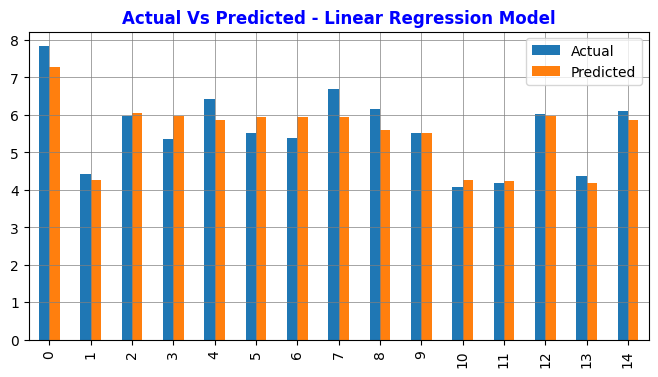

In [155]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

## Performance metrics
print('\t\t\t\t' +'\033[1m' + 'R2 score: {:.3f}'.format(r2_score(Y_test, y_pred)*100))
print('\t\t\t\t' +'RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(Y_test, y_pred))))
print('\t\t\t\t' +'MAE: {:.3f}'.format(mean_absolute_error(Y_test, y_pred)))

# Actuals Vs Predicted
error_diff = pd.DataFrame({'Actual': np.array(Y_test).flatten(), 'Predicted': y_pred.flatten()})
#print(error_diff.head(5))

#Visualize the error
df_reg_error = error_diff.head(15)
df_reg_error.plot(kind = 'bar',figsize=(8,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual Vs Predicted - Linear Regression Model", weight="bold", c="blue", fontsize=12)
plt.show()

### Model 4 - Gradient Boosting Regressor (Post Feature Optimization)

				R2 score: 73.227
				RMSE: 0.557
				MAE: 0.455


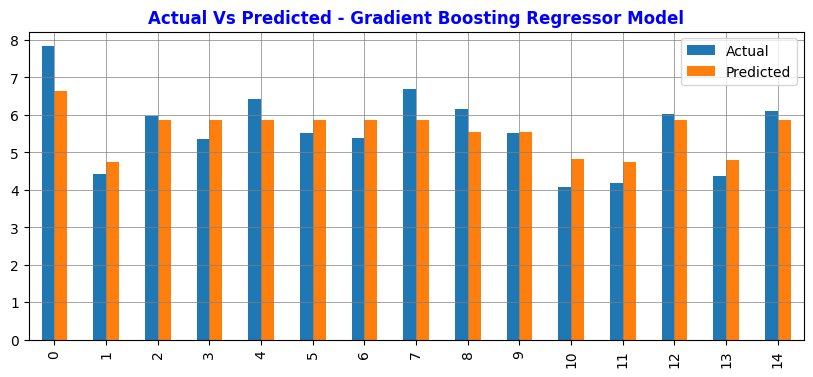

In [156]:
# Gradient Boosting Regressor
GBoost = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.01)
GBoost.fit(X_train, Y_train)

y_pred = GBoost.predict(X_test)

## Performance metrics
print('\t\t\t\t' +'\033[1m' + 'R2 score: {:.3f}'.format(r2_score(Y_test, y_pred)*100))
print('\t\t\t\t' +'RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(Y_test, y_pred))))
print('\t\t\t\t' +'MAE: {:.3f}'.format(mean_absolute_error(Y_test, y_pred)))

# Actuals Vs Predicted
error_diff_gb = pd.DataFrame({'Actual': np.array(Y_test).flatten(), 'Predicted': y_pred.flatten()})
#print(error_diff.head(5))

#Visualize the error
df_gb_error = error_diff_gb.head(15)
df_gb_error.plot(kind = 'bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual Vs Predicted - Gradient Boosting Regressor Model", weight="bold", c="blue", fontsize=12)
plt.show()

#### Model 5 - Random Forest Regressor

				R2 score: 86.944
				RMSE: 0.389
				MAE: 0.312


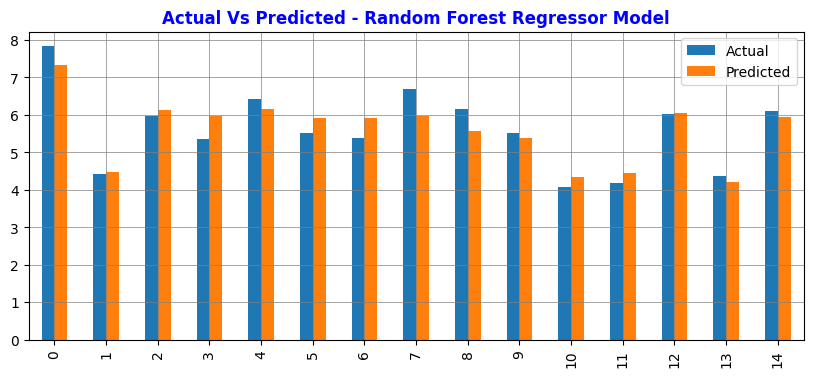

In [157]:
# Random Forest Regressor
Random_Forest = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='log2',n_estimators=100, random_state=42)
Random_Forest.fit(X_train, Y_train)

y_pred = Random_Forest.predict(X_test)

## Performance metrics
## Performance metrics
print('\t\t\t\t' +'\033[1m' + 'R2 score: {:.3f}'.format(r2_score(Y_test, y_pred)*100))
print('\t\t\t\t' +'RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(Y_test, y_pred))))
print('\t\t\t\t' +'MAE: {:.3f}'.format(mean_absolute_error(Y_test, y_pred)))

# Actuals Vs Predicted
error_diff_gb = pd.DataFrame({'Actual': np.array(Y_test).flatten(), 'Predicted': y_pred.flatten()})
#print(error_diff.head(5))

#Visualize the error
df_gb_error = error_diff_gb.head(15)
df_gb_error.plot(kind = 'bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual Vs Predicted - Random Forest Regressor Model", weight="bold", c="blue", fontsize=12)
plt.show()

#### Model 6 - XGB Regressor

In [158]:
from xgboost import XGBRegressor

				R2 score: 86.601
				RMSE: 0.394
				MAE: 0.318


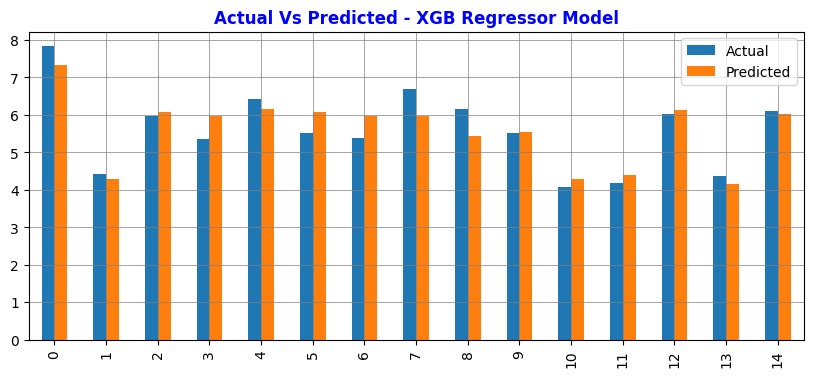

In [159]:
# XGB Regressor Model
XGB_Reg = XGBRegressor()
XGB_Reg.fit(X_train, Y_train)

y_pred = XGB_Reg.predict(X_test)

## Performance metrics

## Performance metrics
print('\t\t\t\t' +'\033[1m' + 'R2 score: {:.3f}'.format(r2_score(Y_test, y_pred)*100))
print('\t\t\t\t' +'RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(Y_test, y_pred))))
print('\t\t\t\t' +'MAE: {:.3f}'.format(mean_absolute_error(Y_test, y_pred)))

# Actuals Vs Predicted
error_diff_gb = pd.DataFrame({'Actual': np.array(Y_test).flatten(), 'Predicted': y_pred.flatten()})
#print(error_diff.head(5))

#Visualize the error
df_gb_error = error_diff_gb.head(15)
df_gb_error.plot(kind = 'bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual Vs Predicted - XGB Regressor Model", weight="bold", c="blue", fontsize=12)
plt.show()

### Feature Importance

In [160]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(8,4))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title('Random Forest Regressor Feature Importance', weight="bold", c="blue", fontsize=12)
    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()

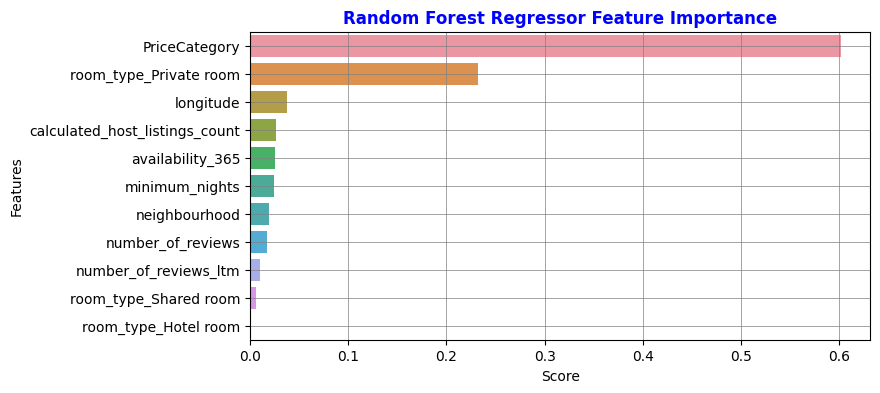

In [161]:
plot_feature_importance(Random_Forest.feature_importances_,X_train.columns)